### Exercice 1 Wine database

Nous allons utiliser la base de données «Wine Data Set » disponible sur le dépôt de
bases de donnes maintenu par l’Université de Californie à Irvine (UCI). Le lien direct
est celui-ci : http://archive.ics.uci.edu/ml/datasets/Wine?Quality

2) Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

3) Réaliser une analyse exploratoire de la base de données en utilisant des box plots et des scatter plots. Analysez s’il y a des variables avec très peu de variabilité et cherchez à identifier des variables qui ont des valeurs différentes pour les différentes classes.

In [1]:
import pandas as pd
import matplotlib as mp
mp.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.pyplot as plt
from math import sqrt




### 1) Créez un notebook pour lire la base de données et générez un dataframe

In [2]:
cols = ["Class", "Alcohol", "Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
wine_df = pd.read_csv("C:\\Users\\timot\\Documents\\HEIG\\ISD\\Labos\\Roy_VanHove_ISD_TP4\\wine.data", sep=",", names=cols)

wine_df



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:

dataNb = len(wine_df.index)
print("Nombre de series (lignes) dans le dataset : ", dataNb)
columns = list(wine_df)


print("Nombre d'attributs (colonnes) dans le dataset: ", len(columns))
print("Logiquement nous devrions avoir", len(columns), " * ", dataNb, " éléments = ", len(columns) * dataNb)
print("Nombre actuel d'éléments: ", wine_df.size)
print ("On peut en conclure qu'il n'y a as de données manquantes")

Nombre de series (lignes) dans le dataset :  178
Nombre d'attributs (colonnes) dans le dataset:  14
Logiquement nous devrions avoir 14  *  178  éléments =  2492
Nombre actuel d'éléments:  2492
On peut en conclure qu'il n'y a as de données manquantes


In [3]:
def getClasses(df):
    class1 = df[df['Class'] == 1]
    class2 = df[df['Class'] == 2]
    class3 = df[df['Class'] == 3]
    return class1,class2,class3

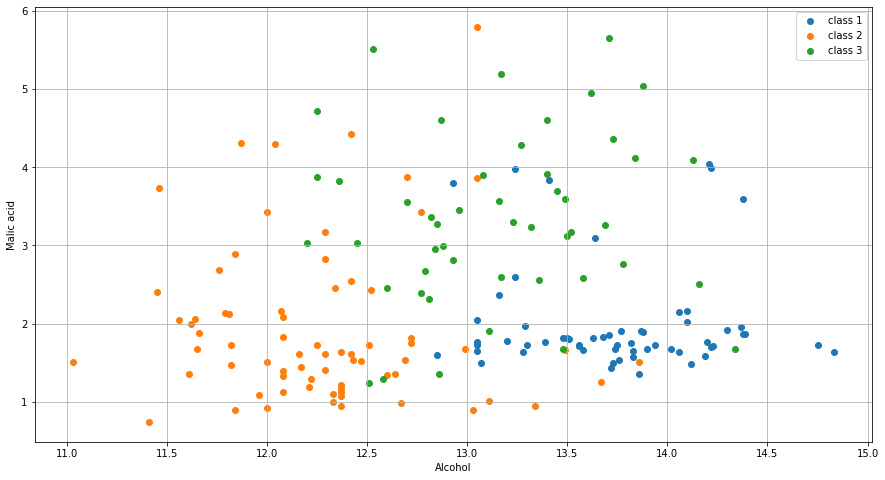

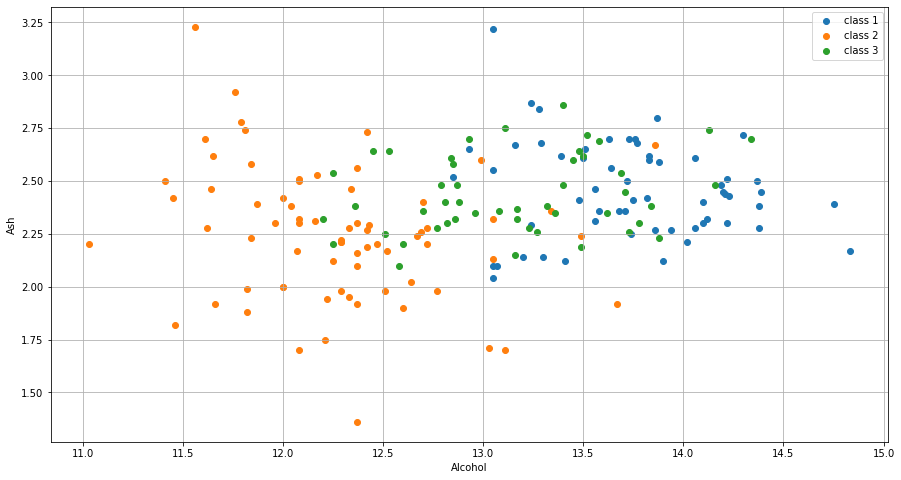

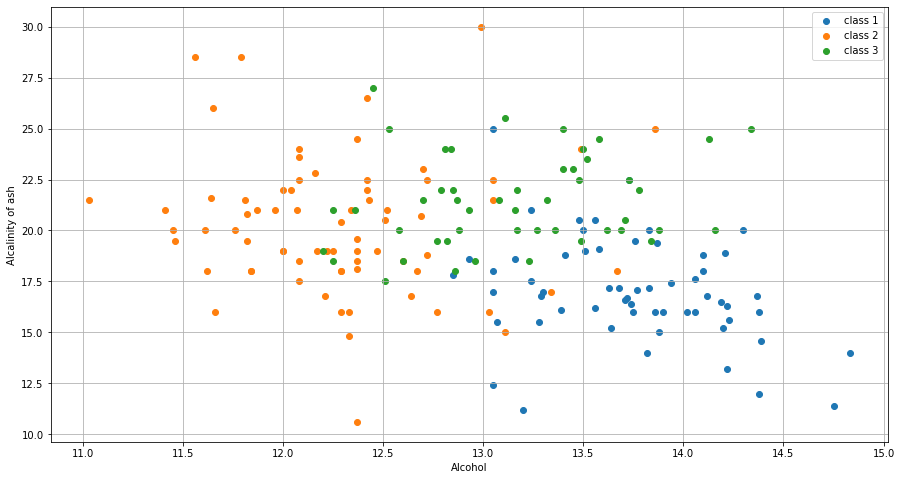

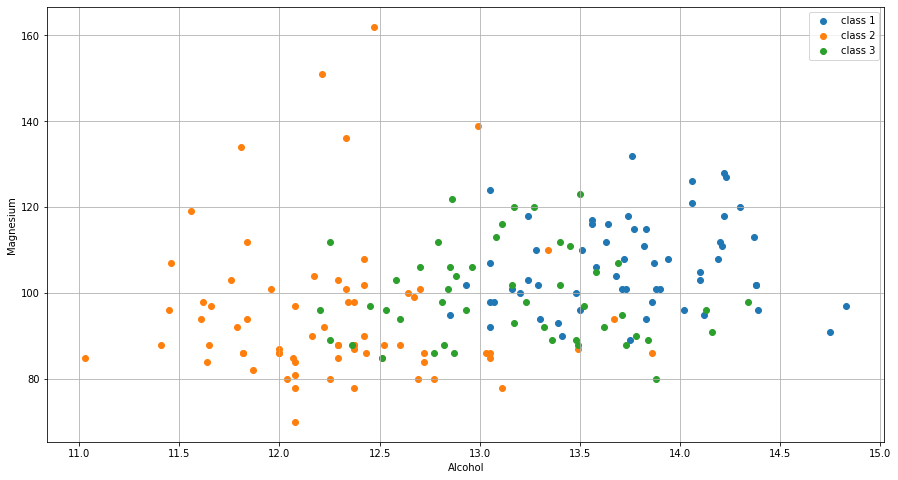

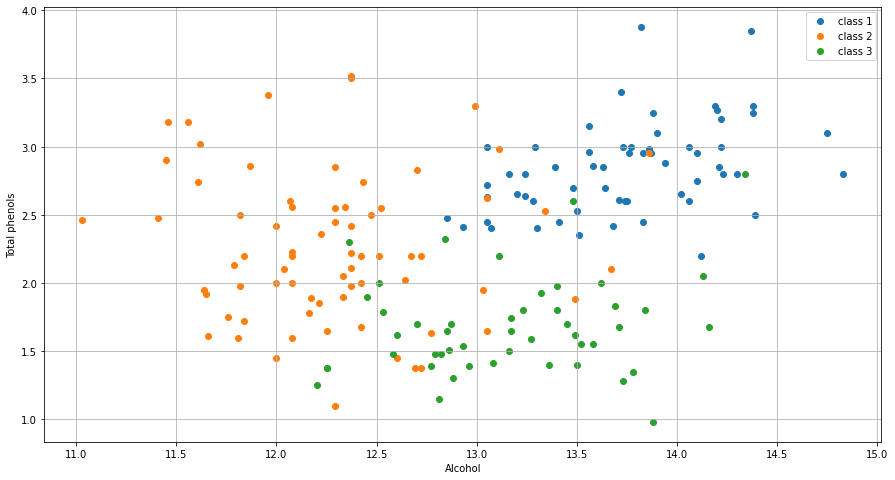

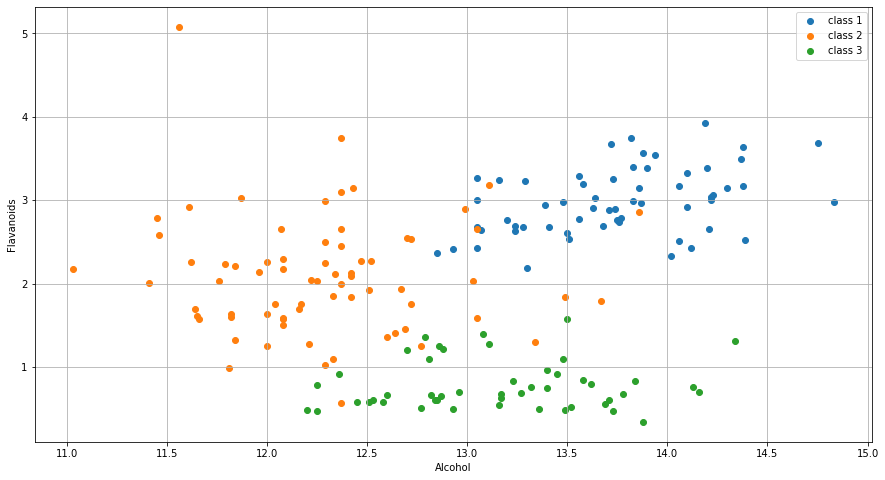

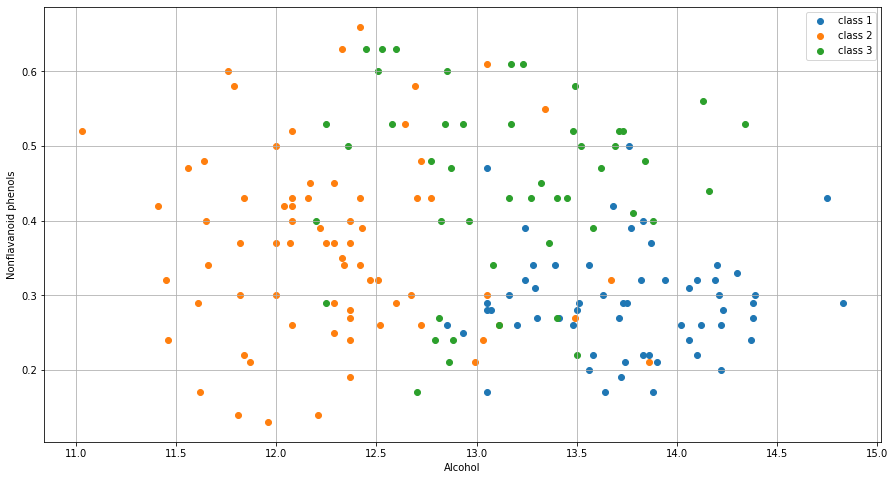

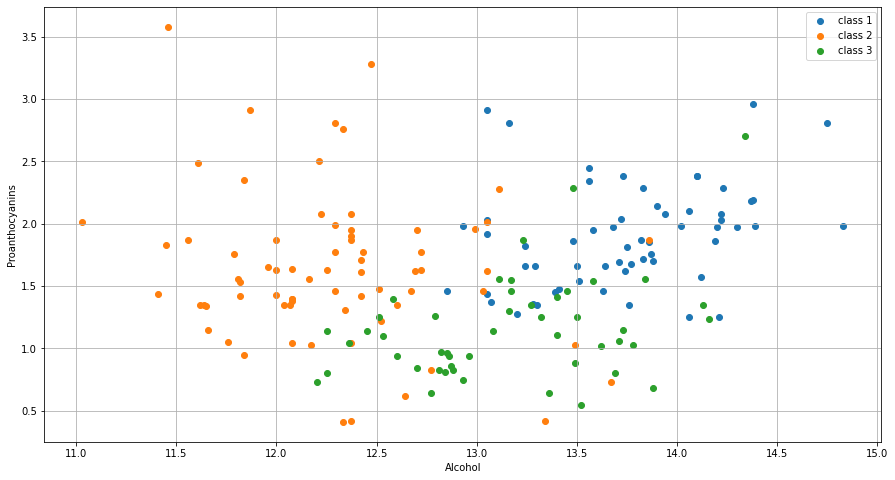

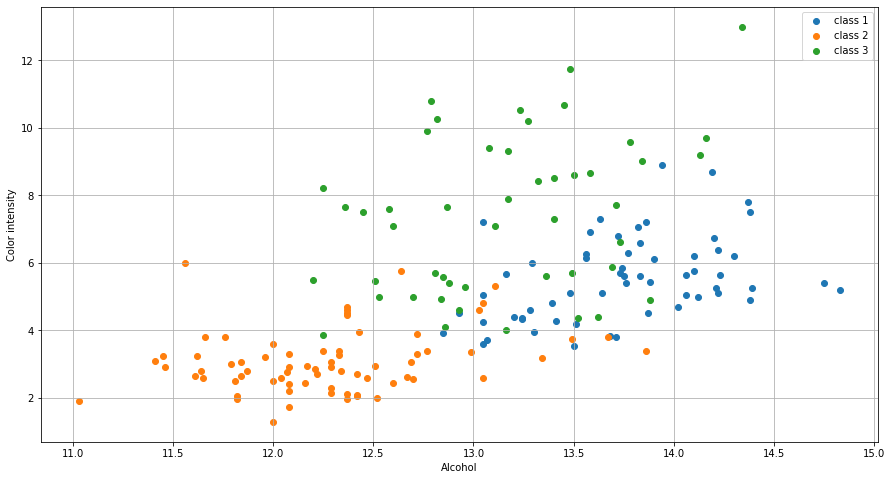

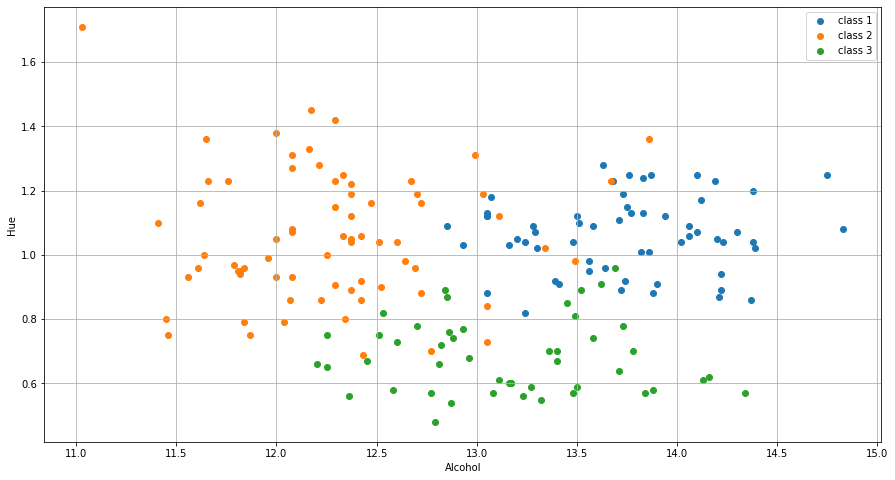

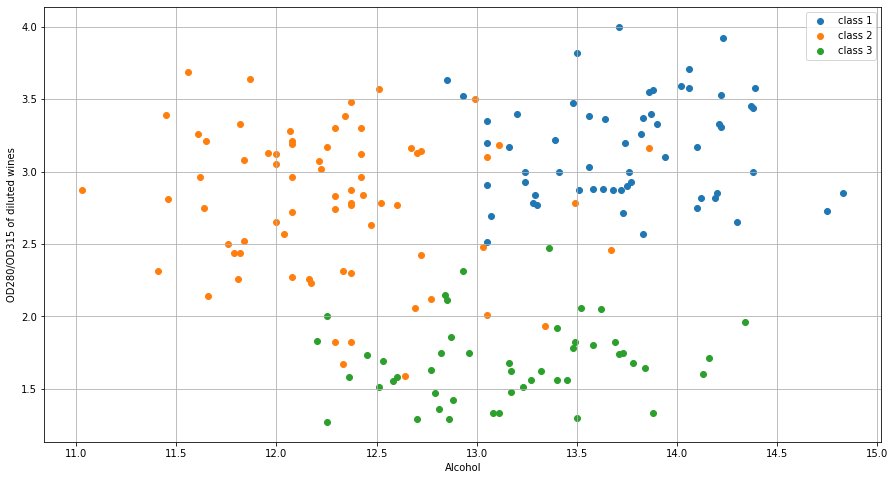

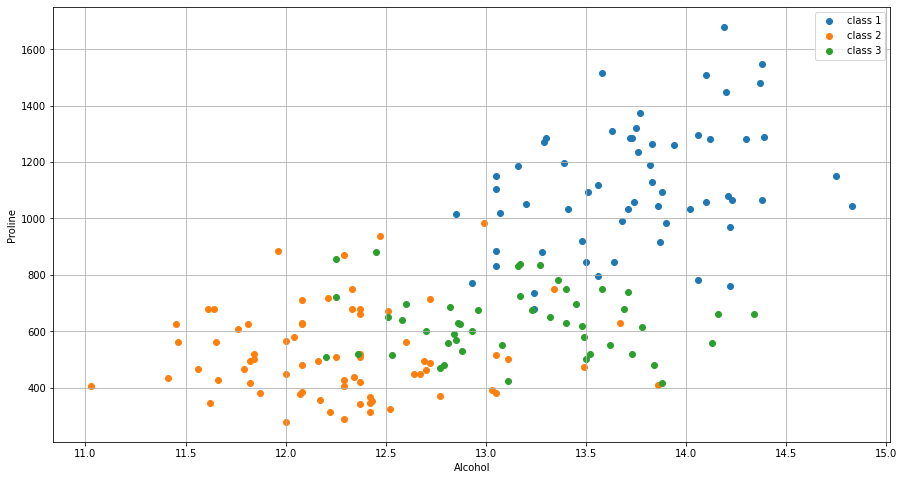

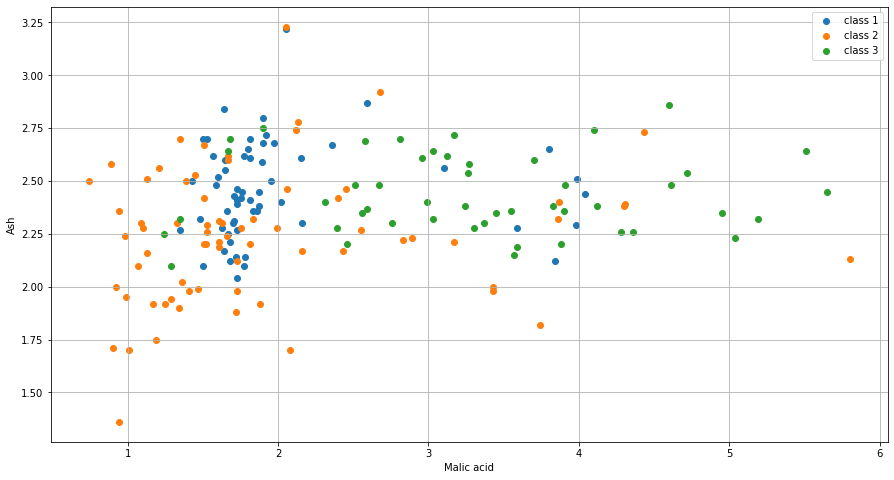

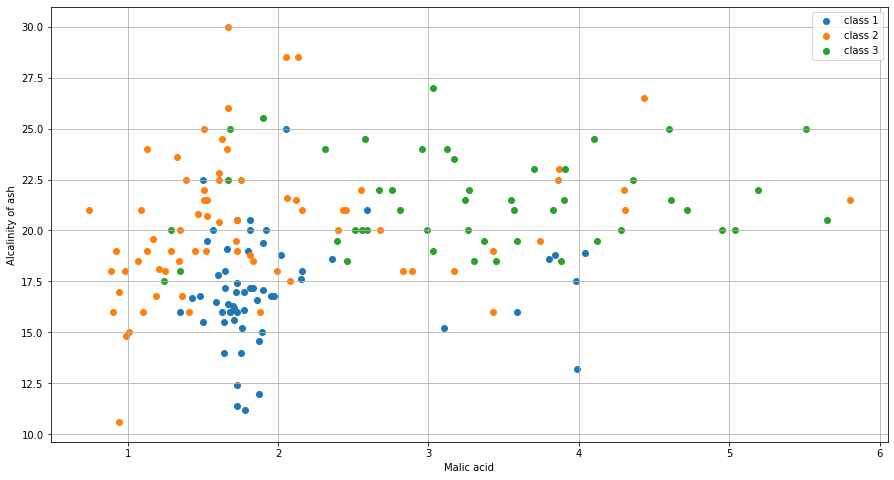

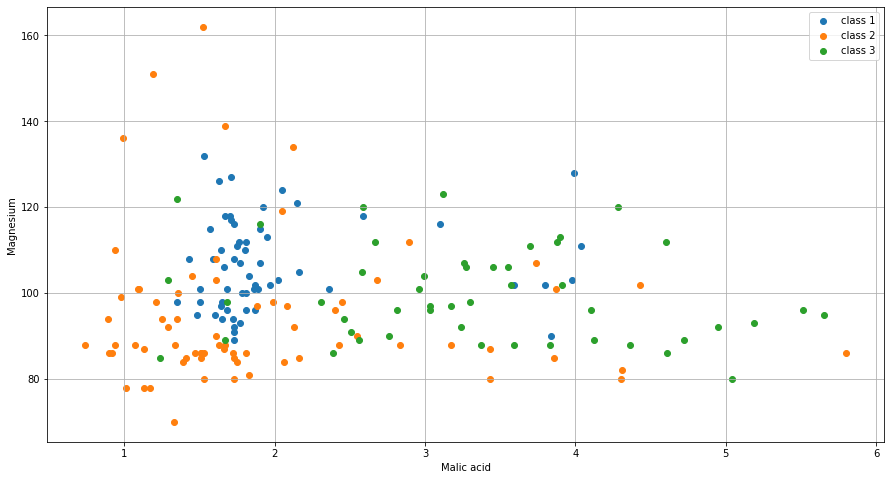

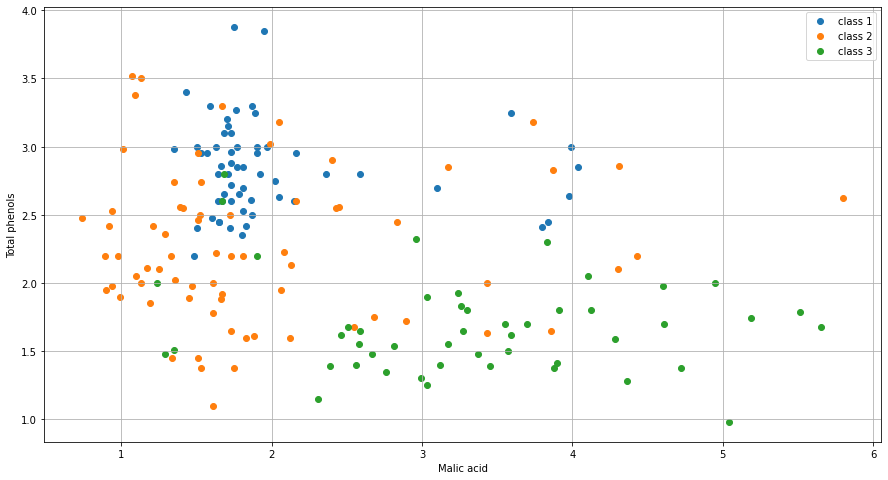

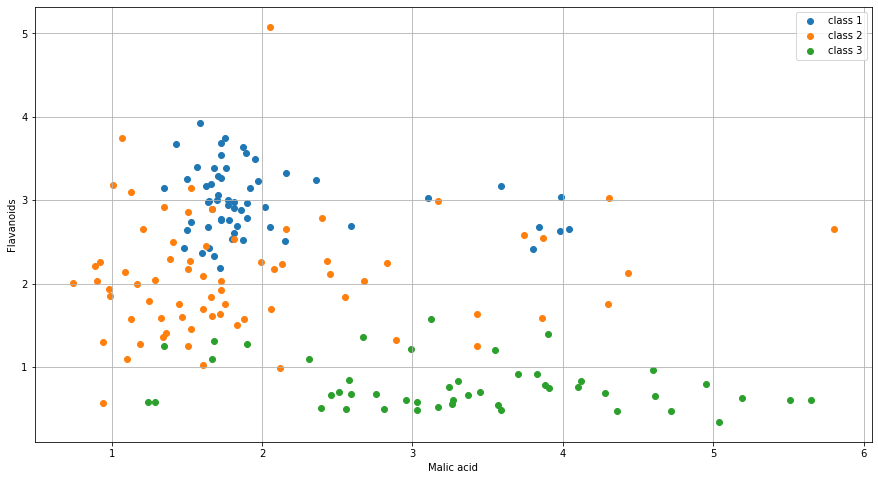

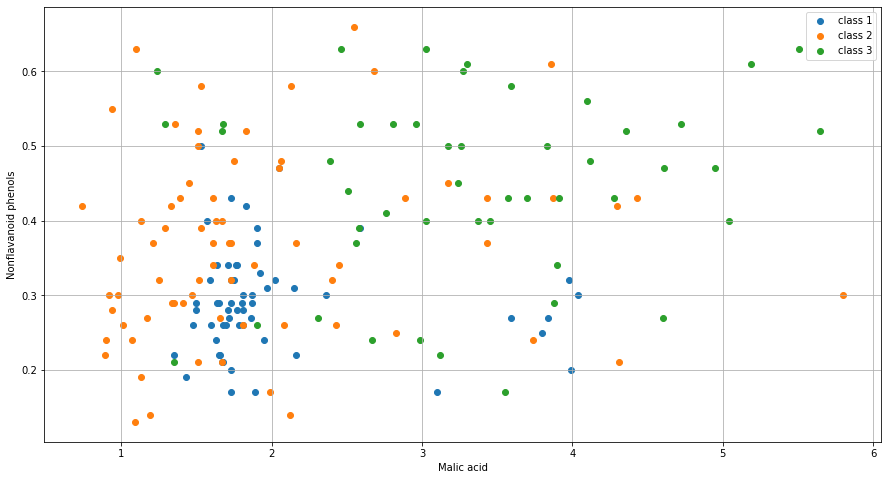

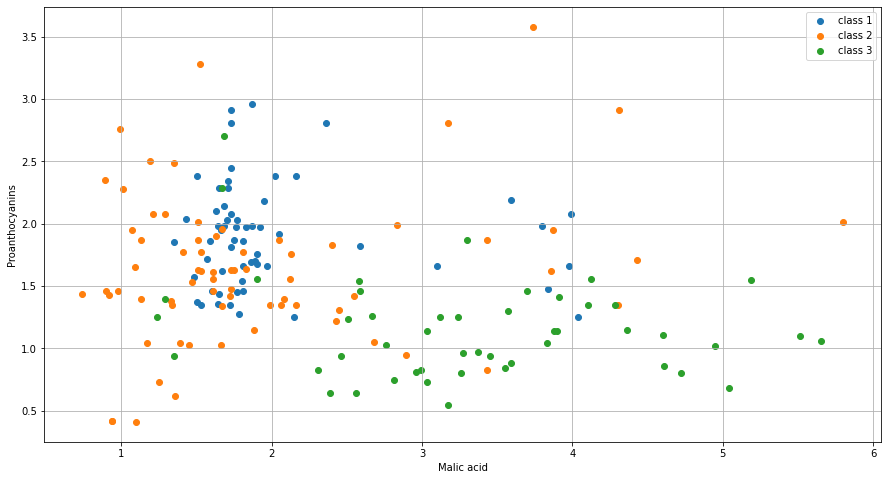

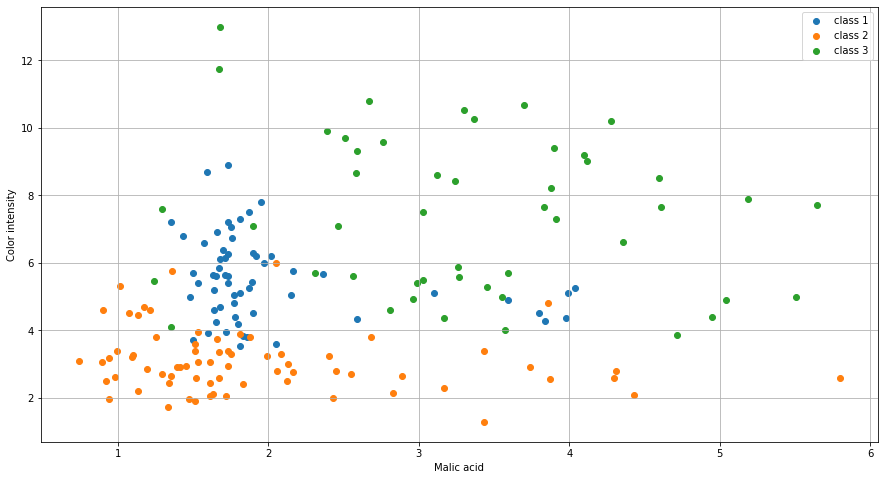

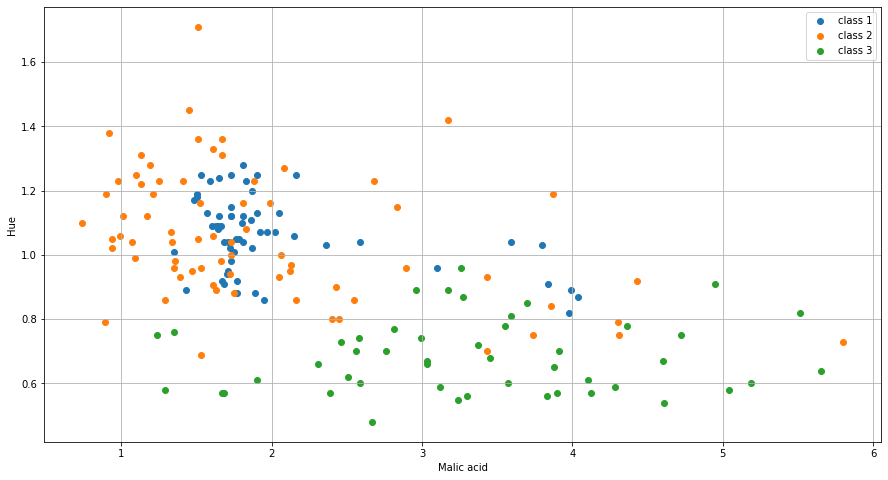

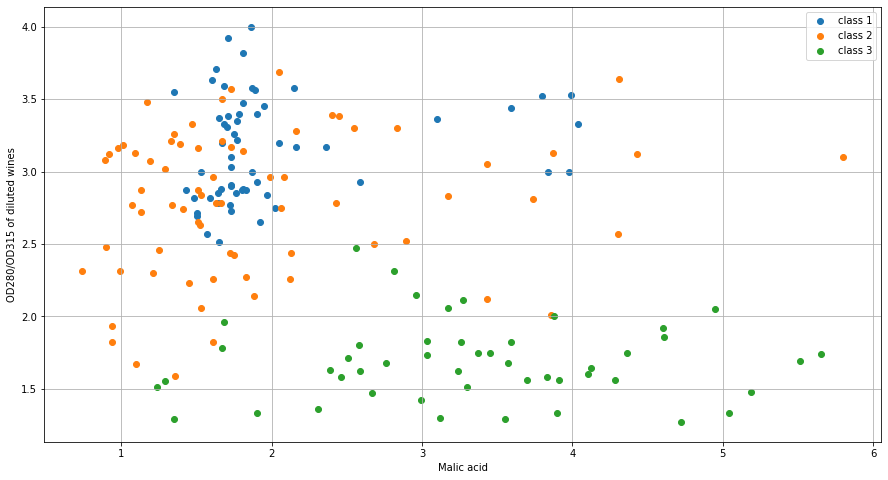

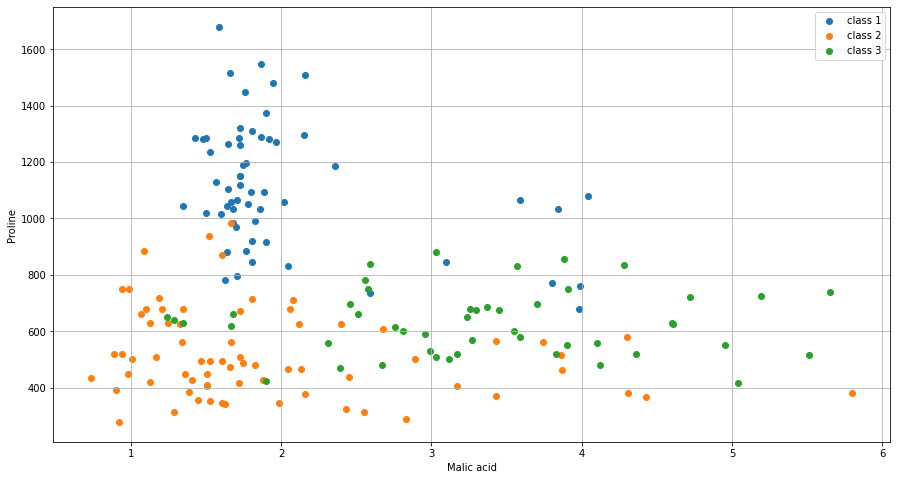

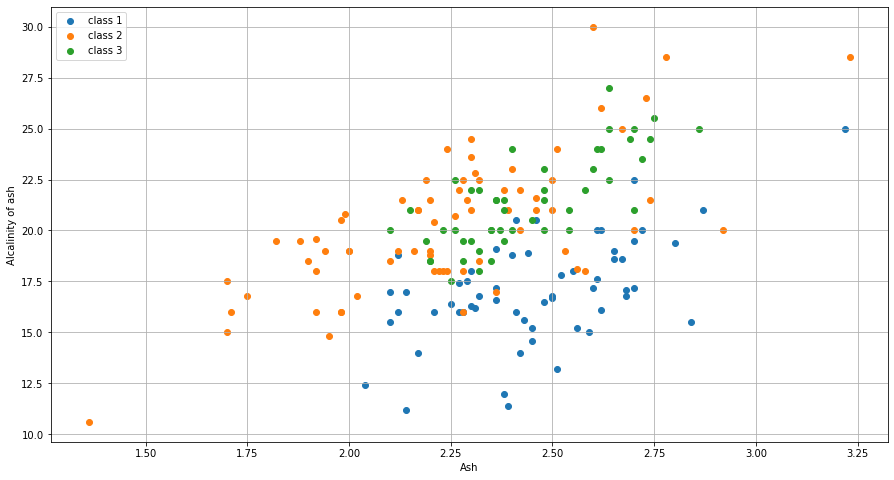

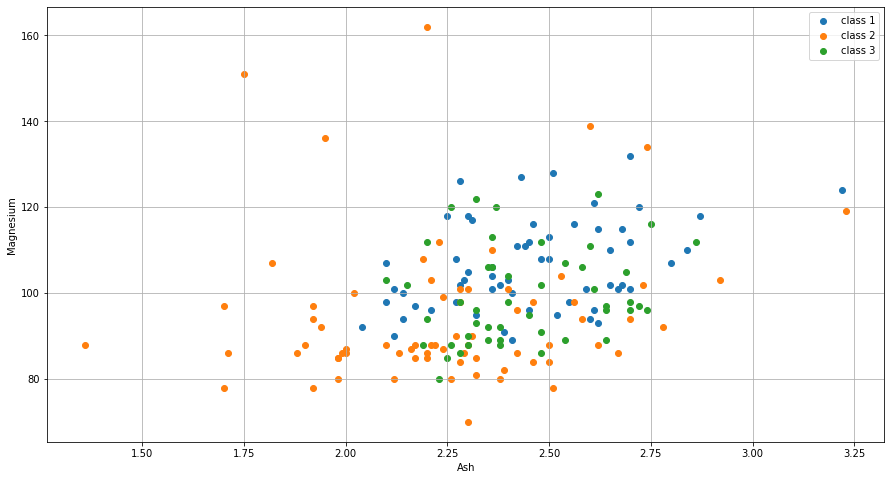

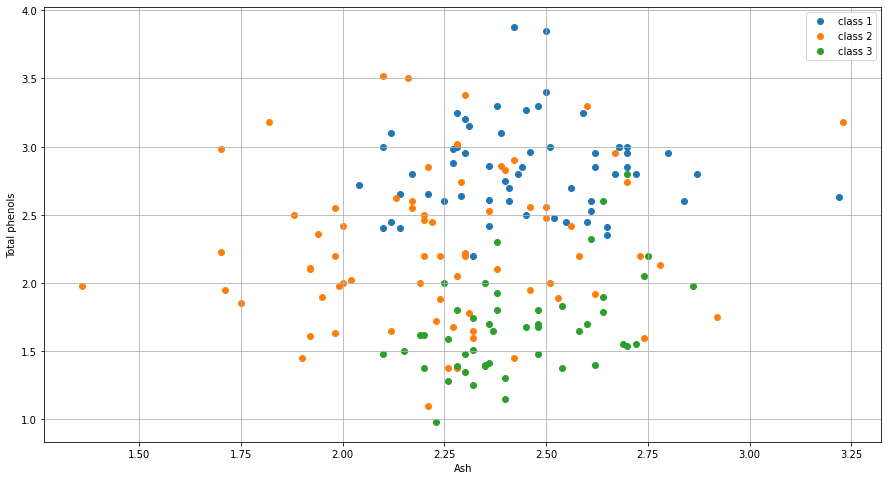

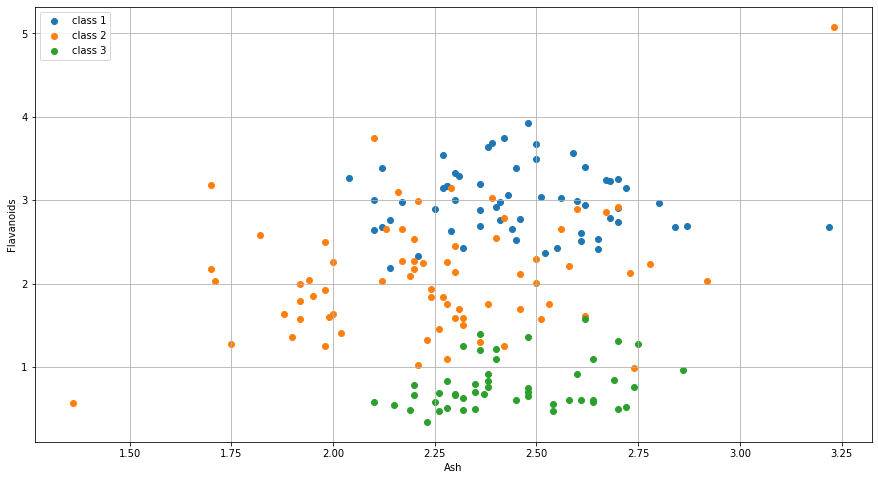

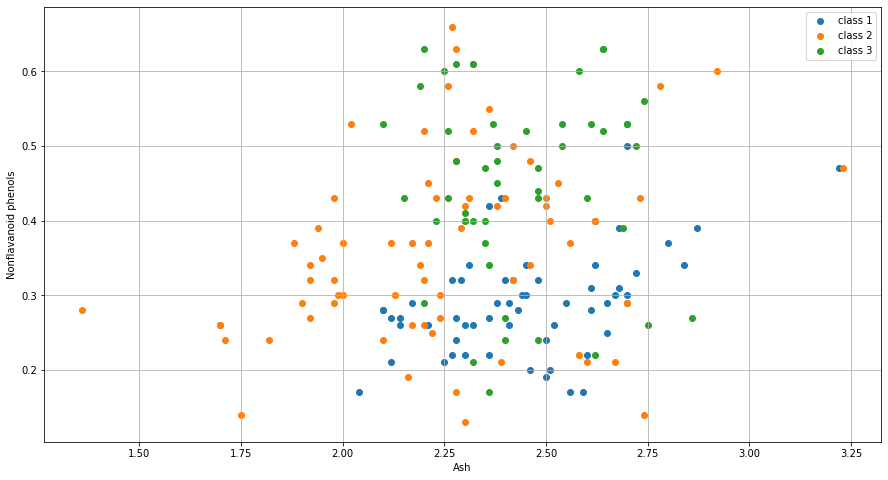

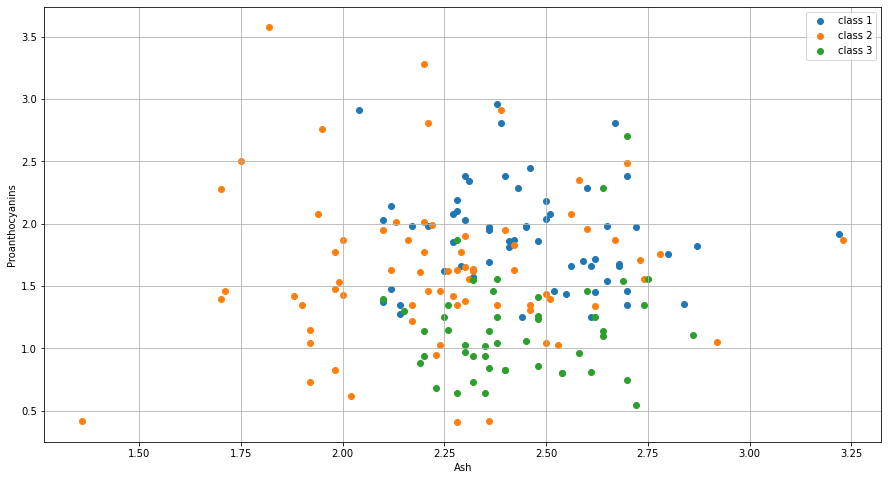

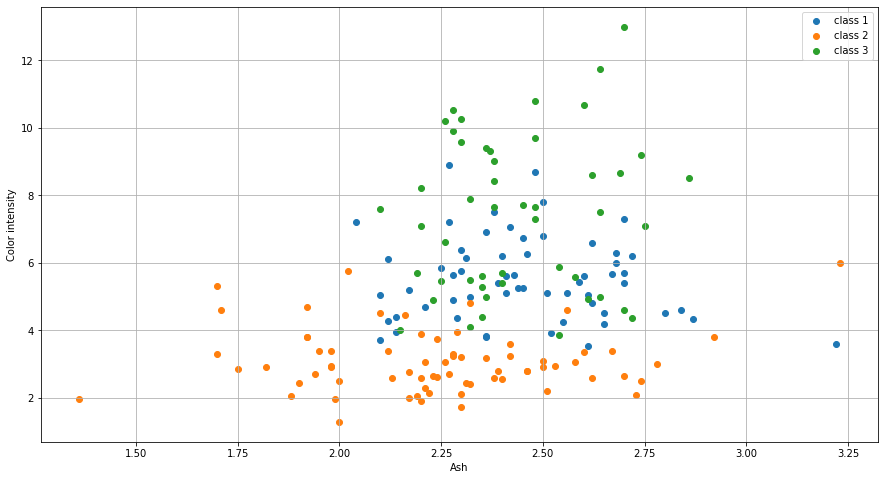

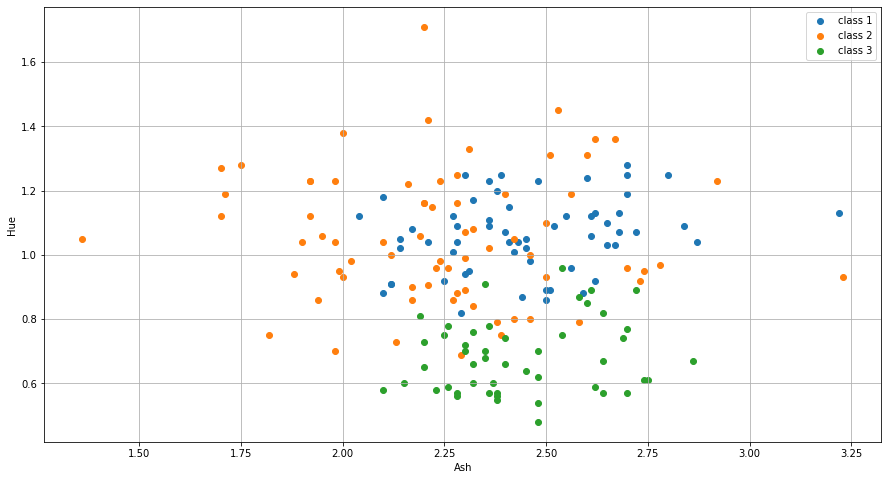

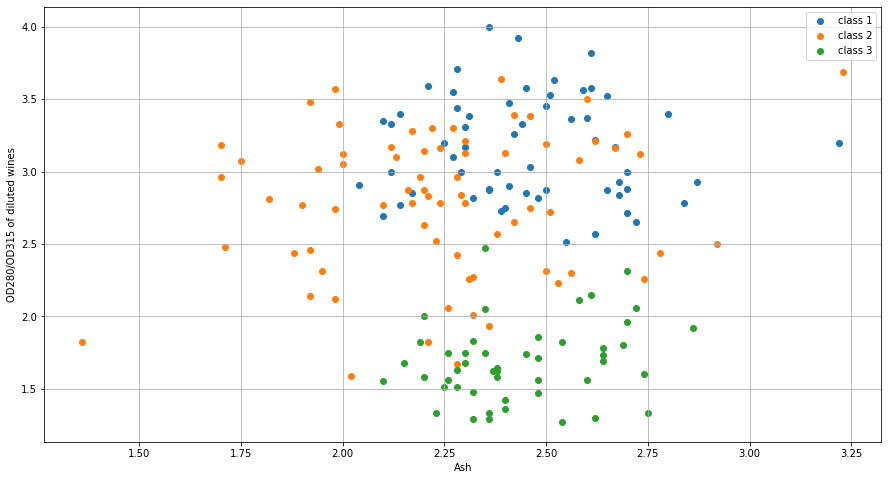

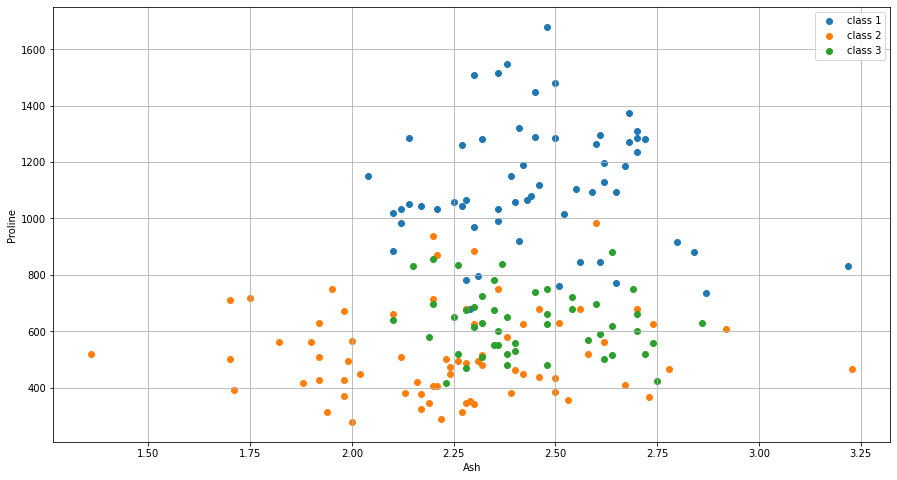

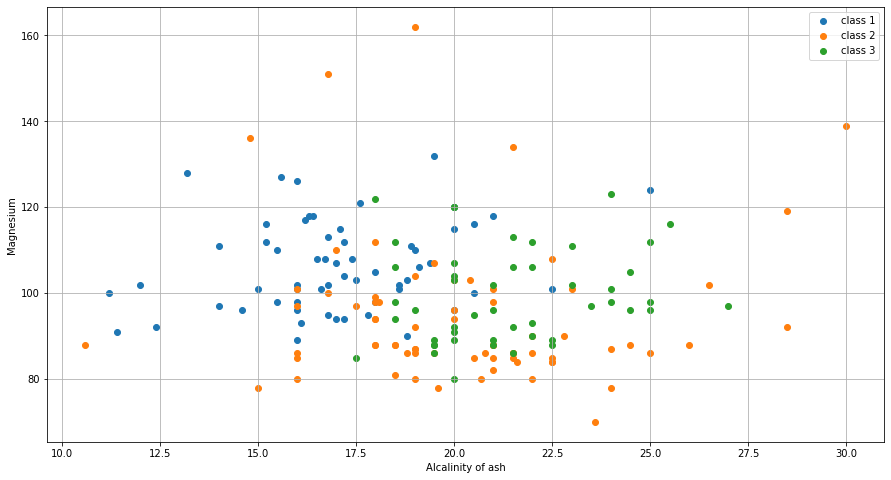

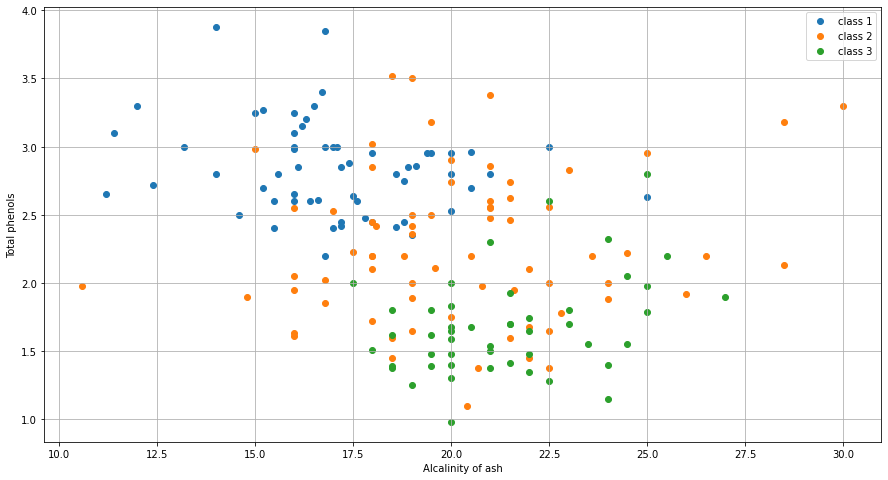

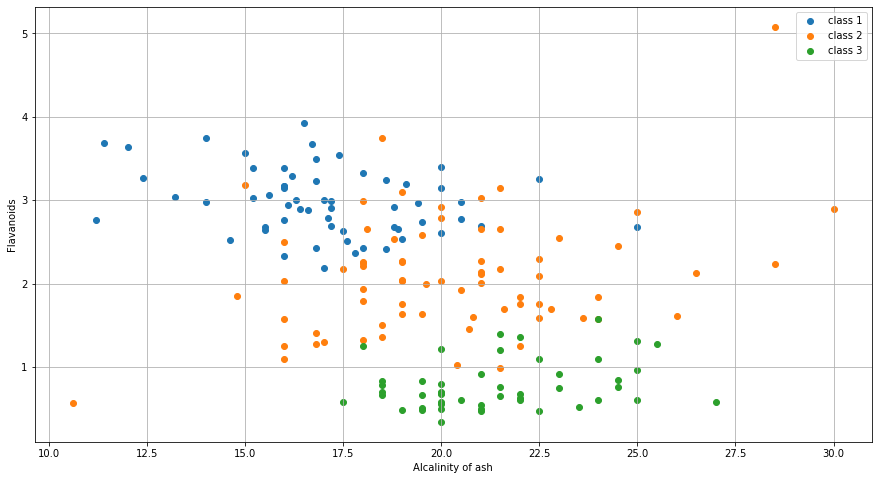

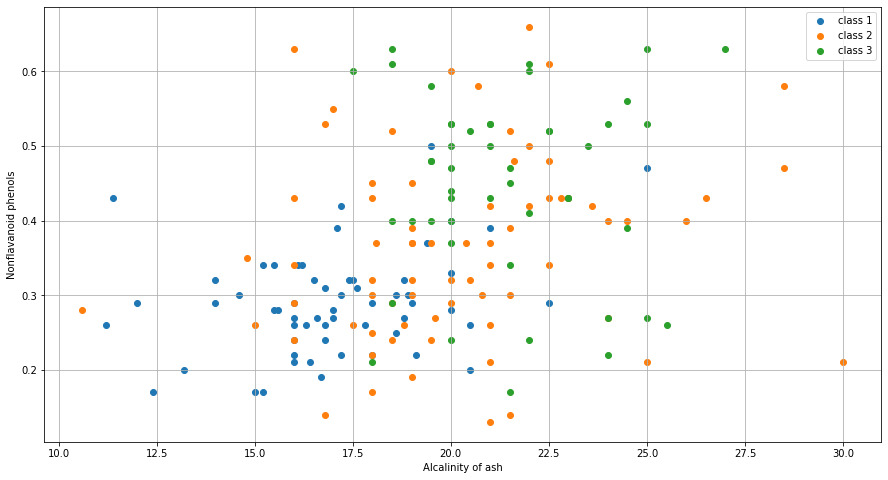

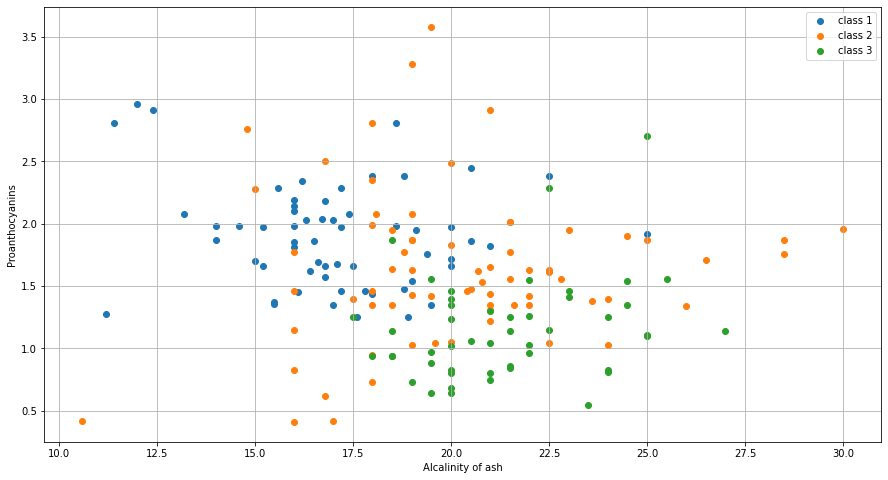

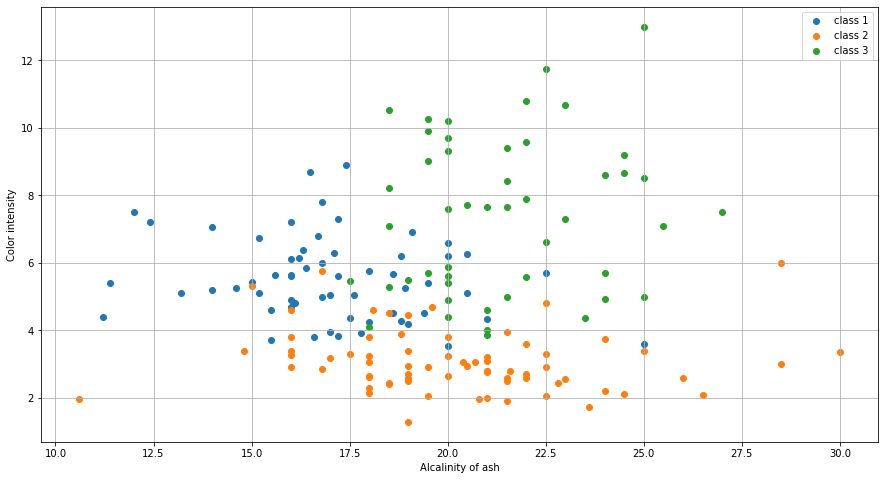

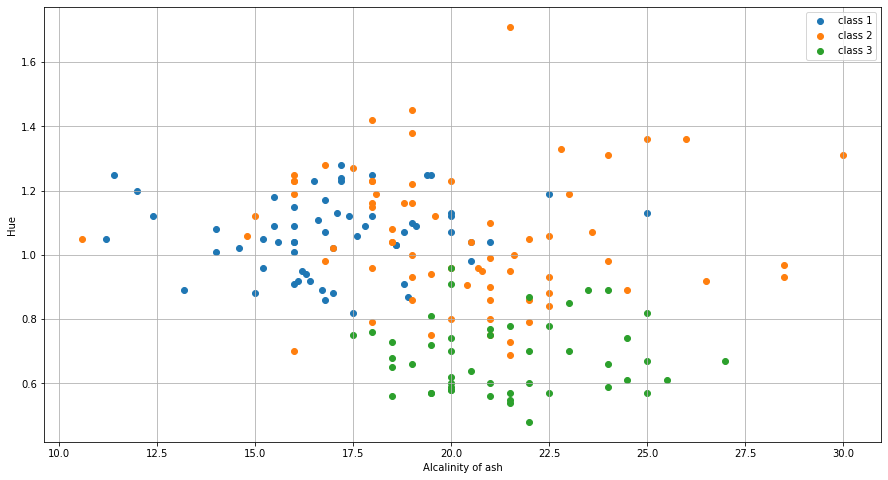

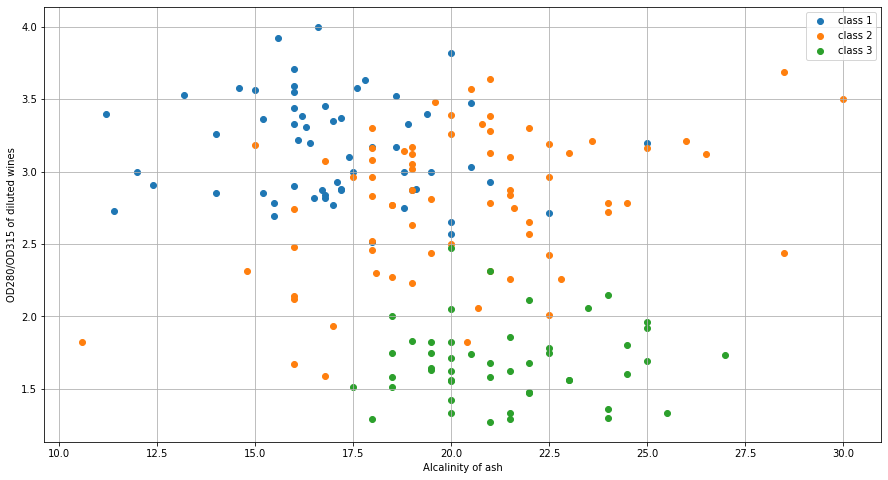

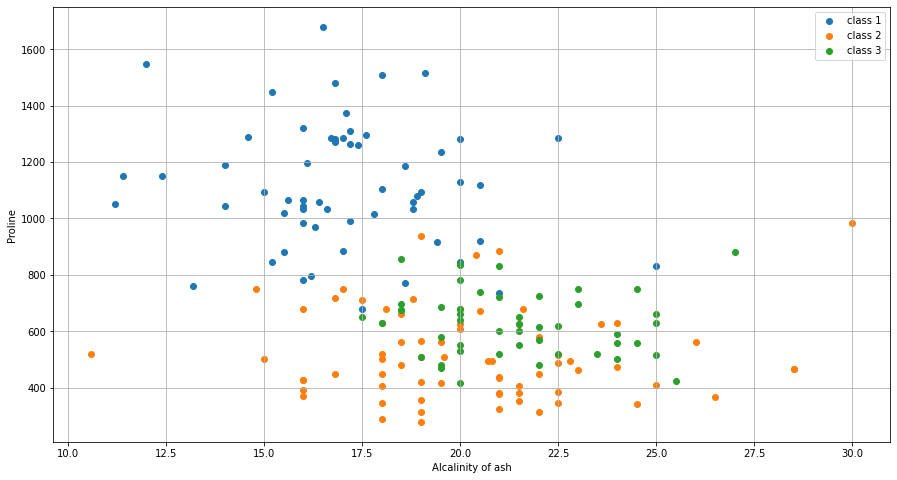

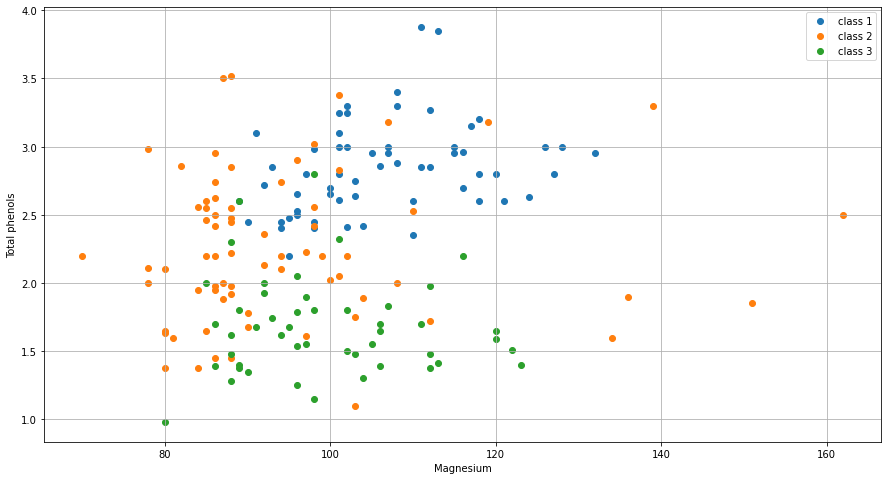

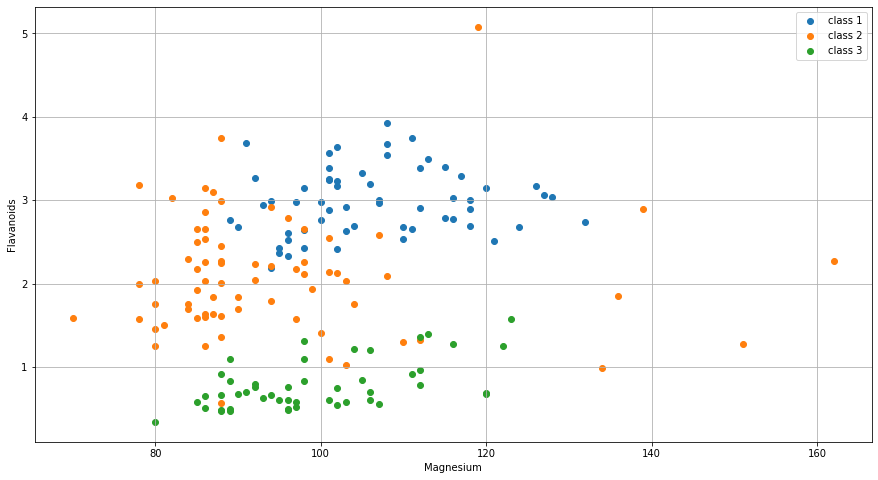

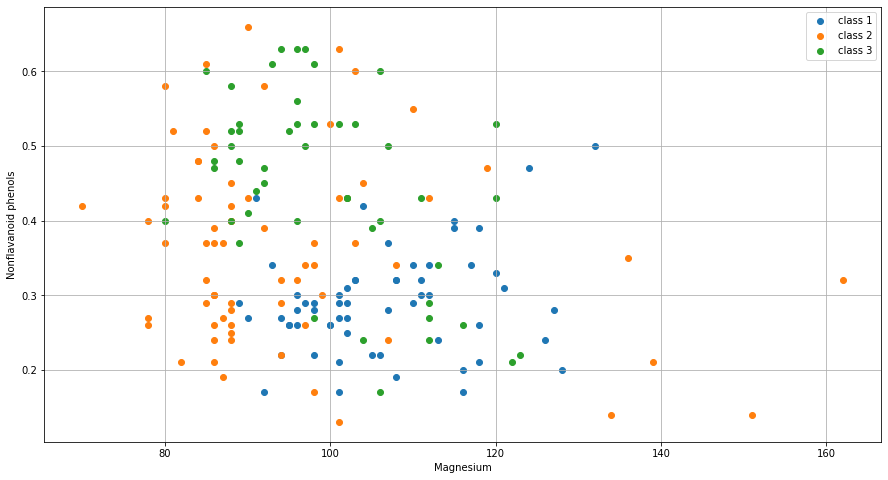

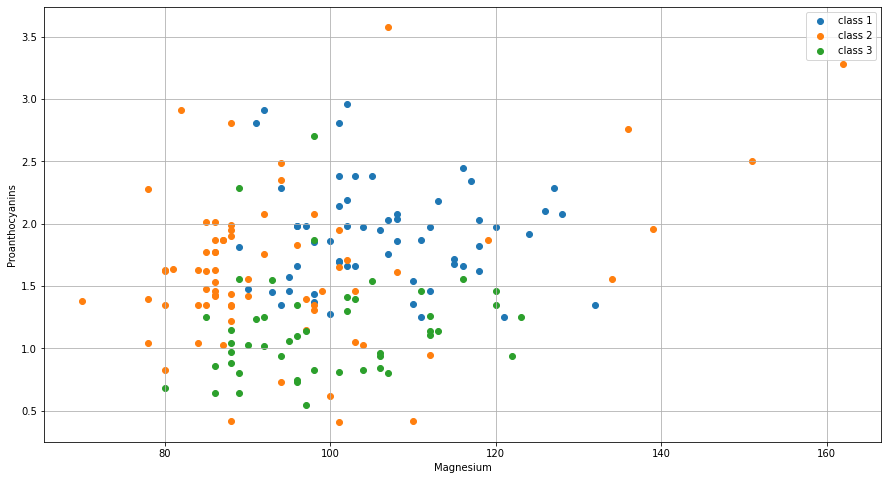

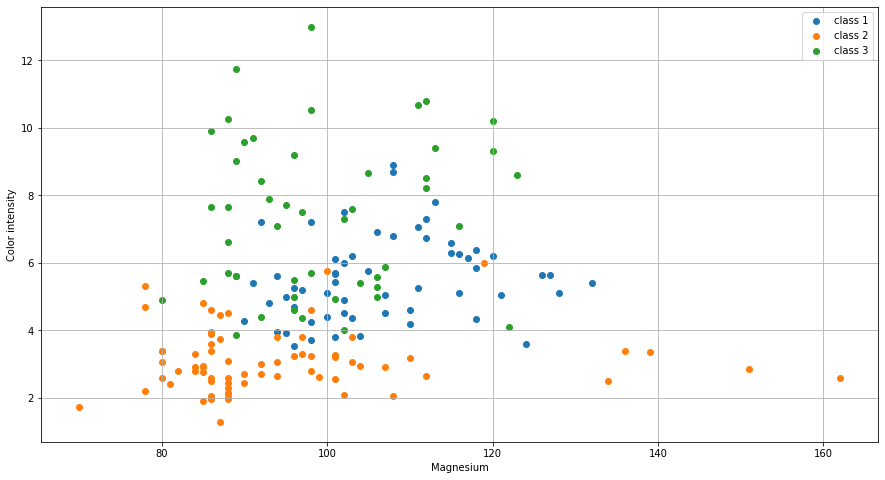

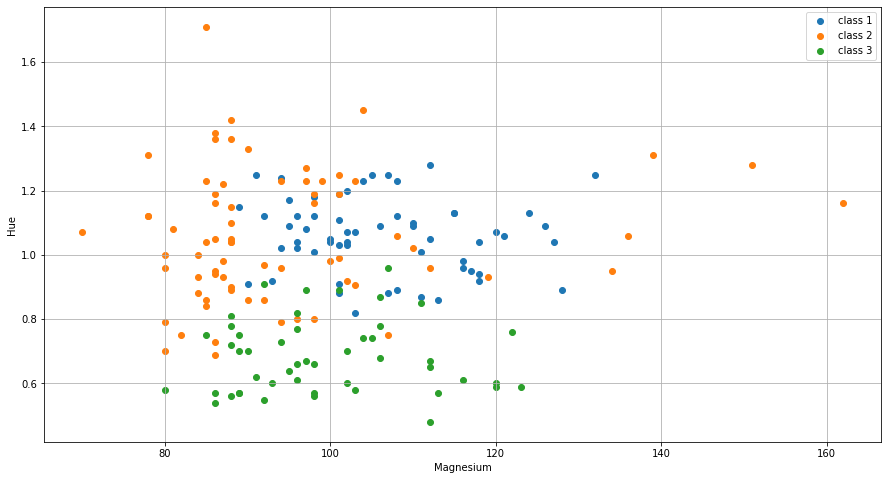

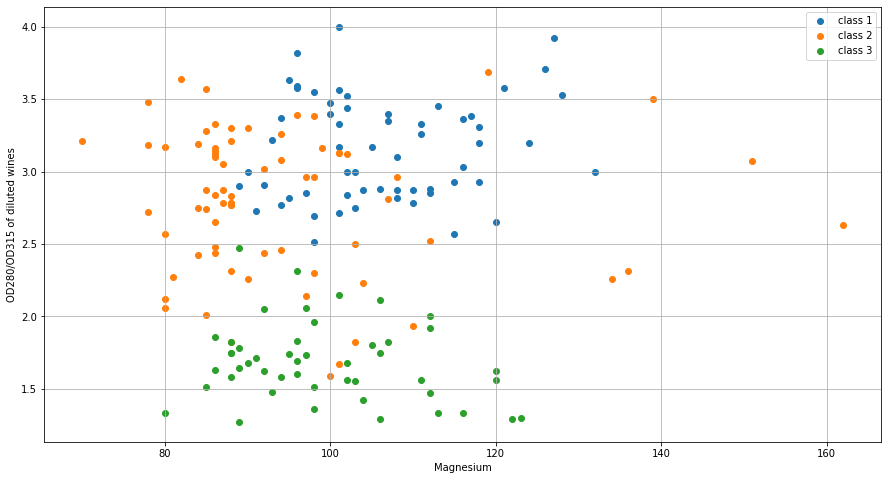

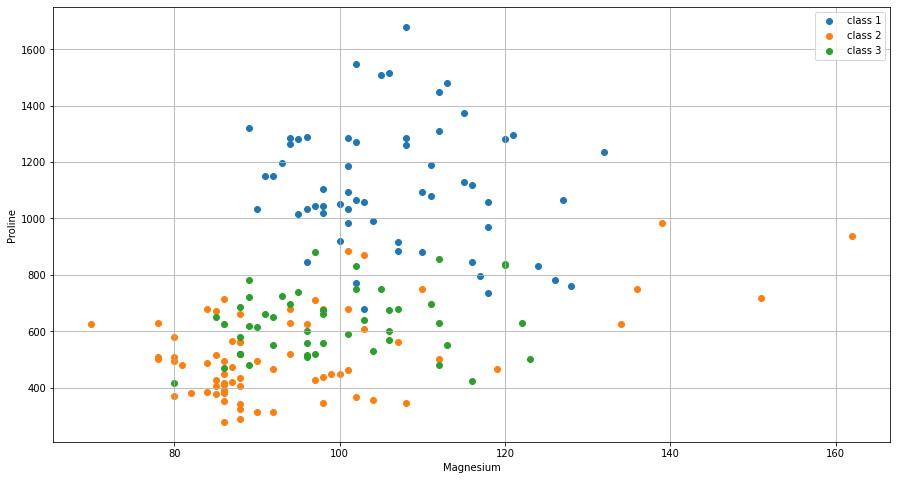

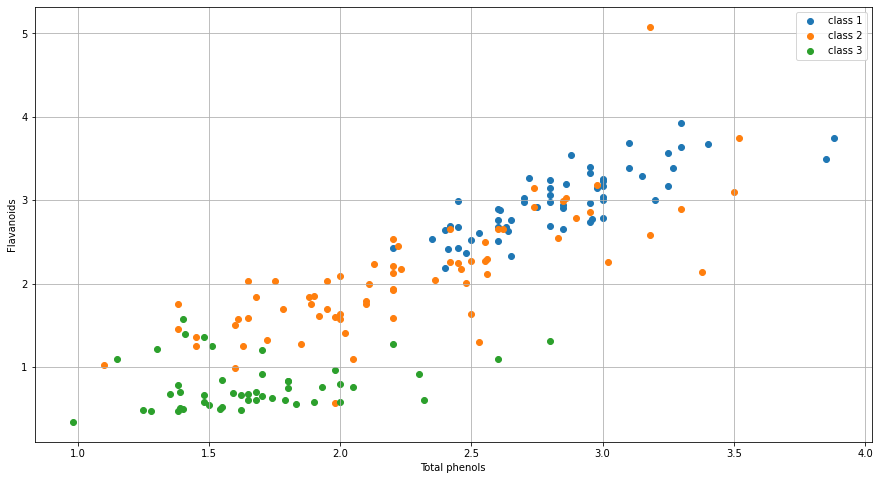

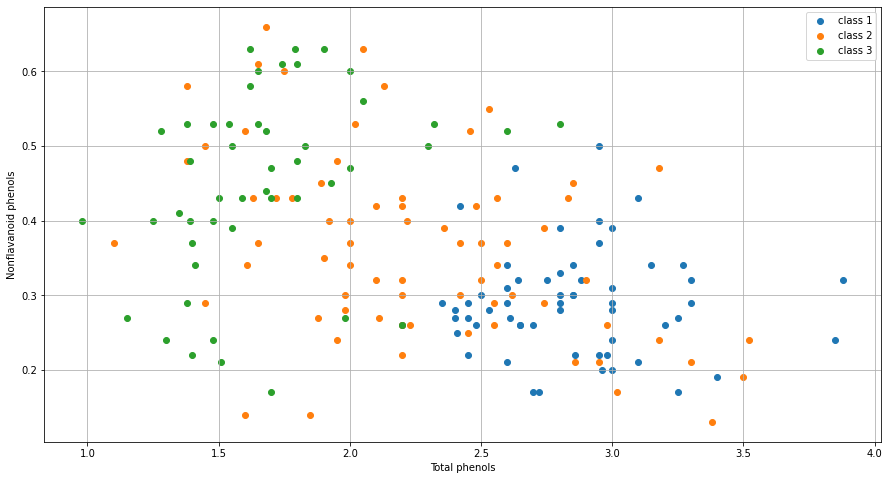

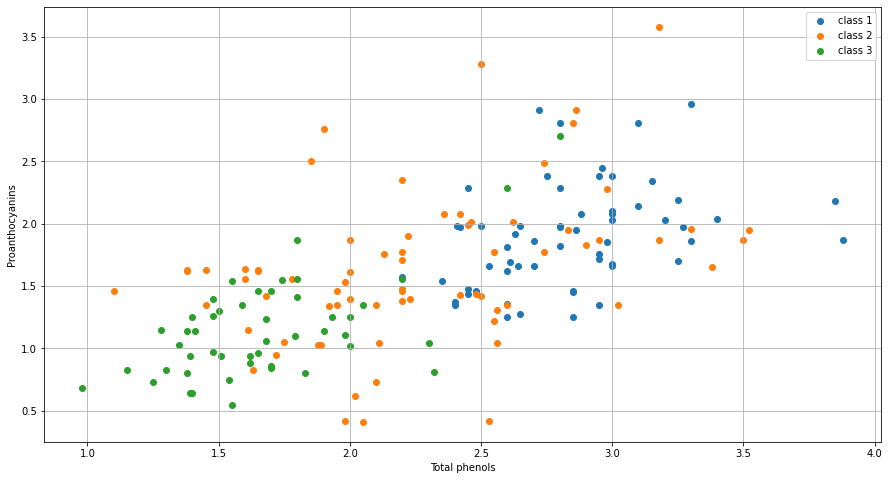

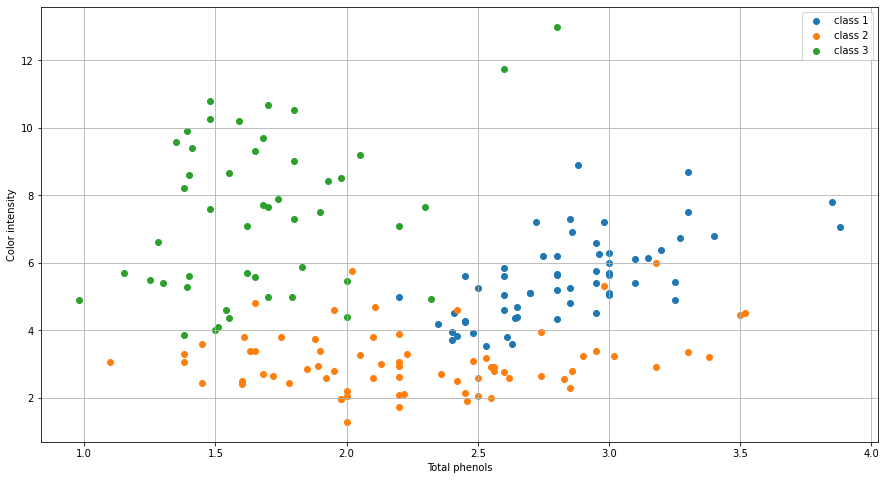

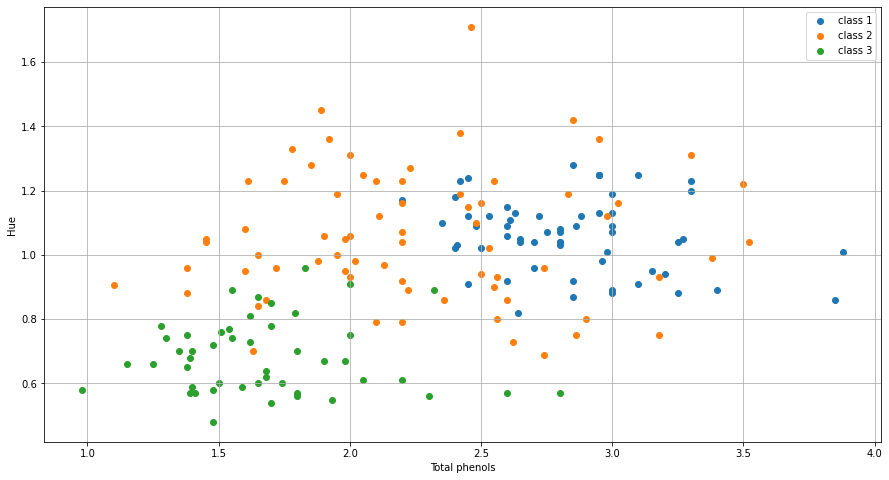

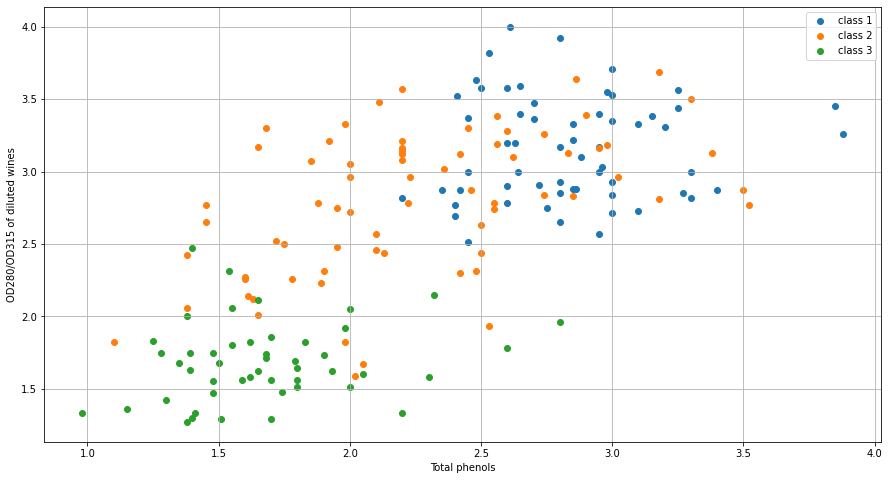

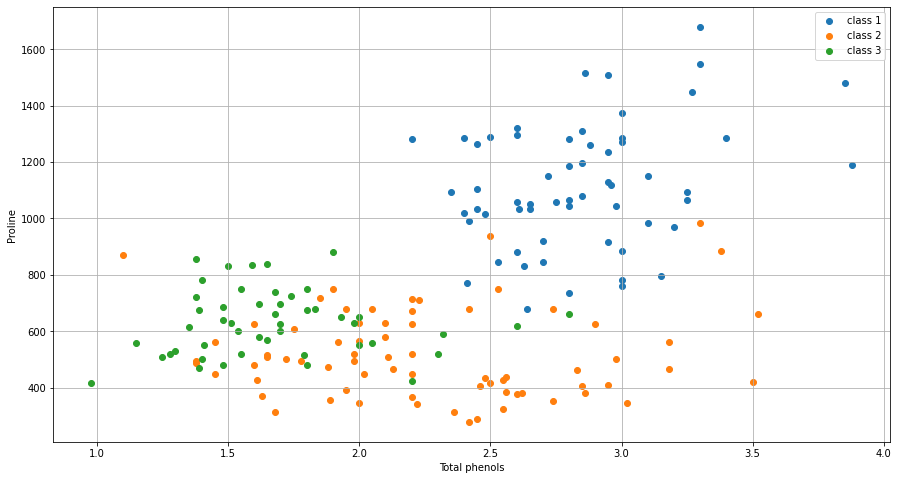

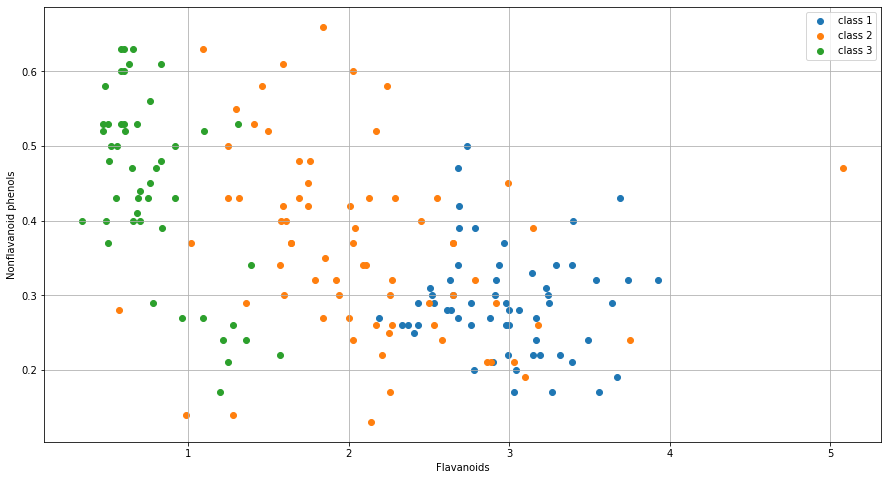

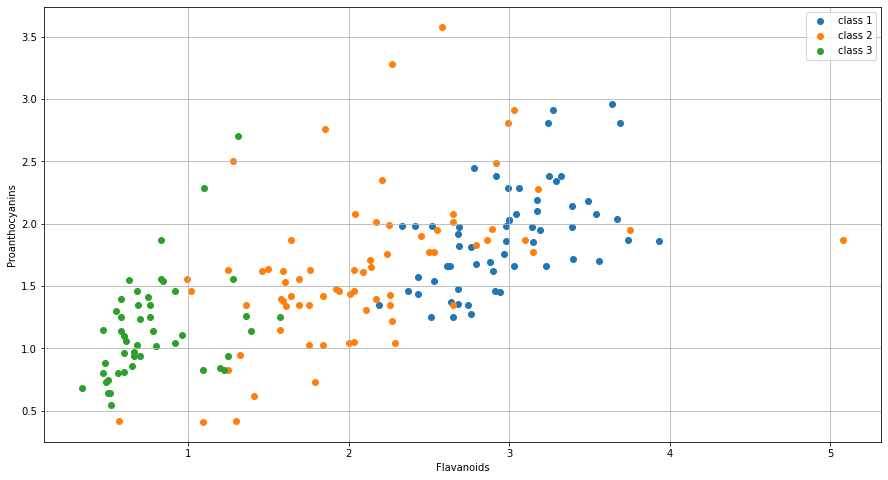

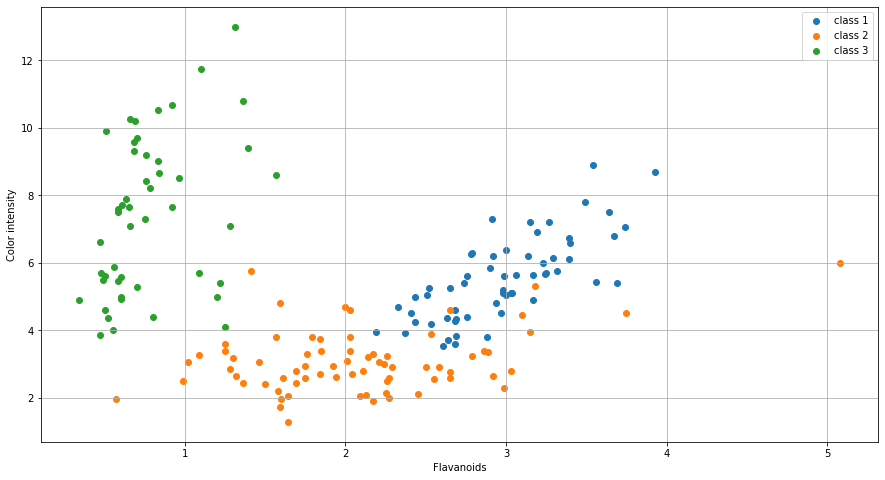

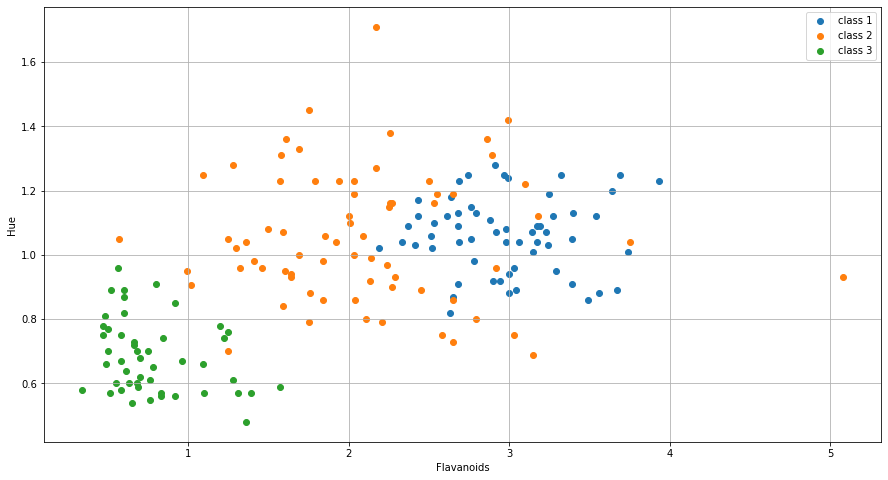

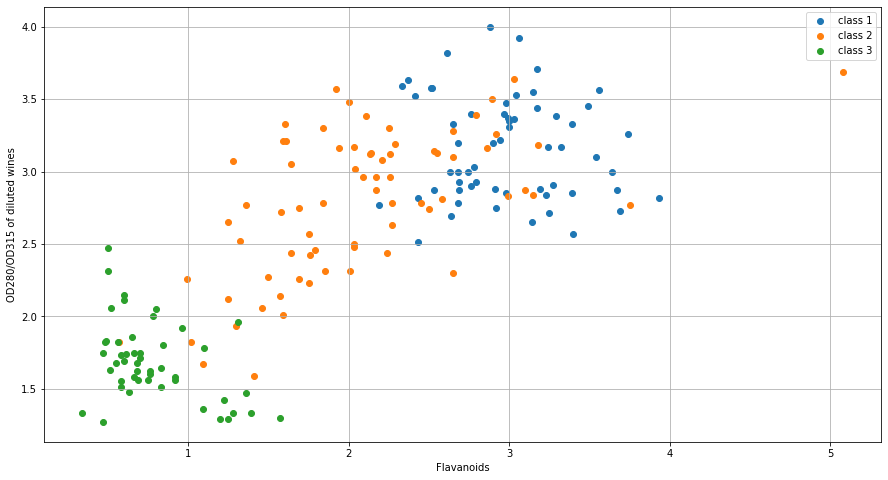

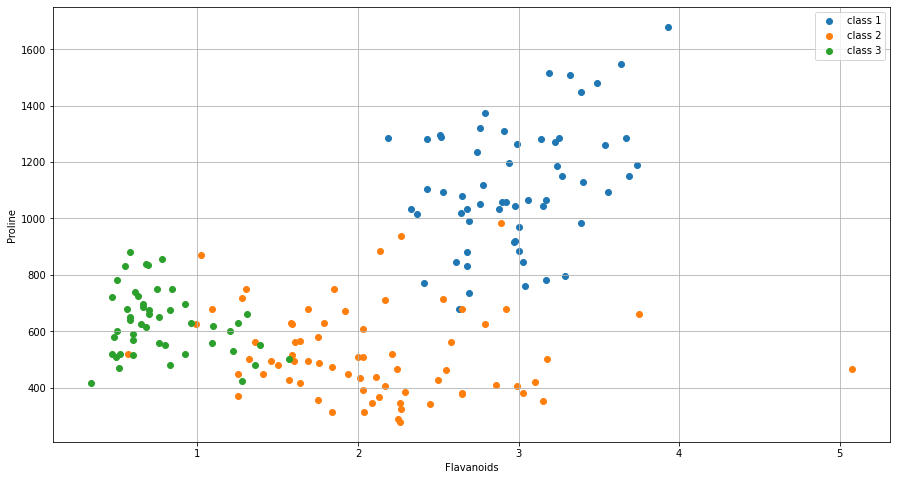

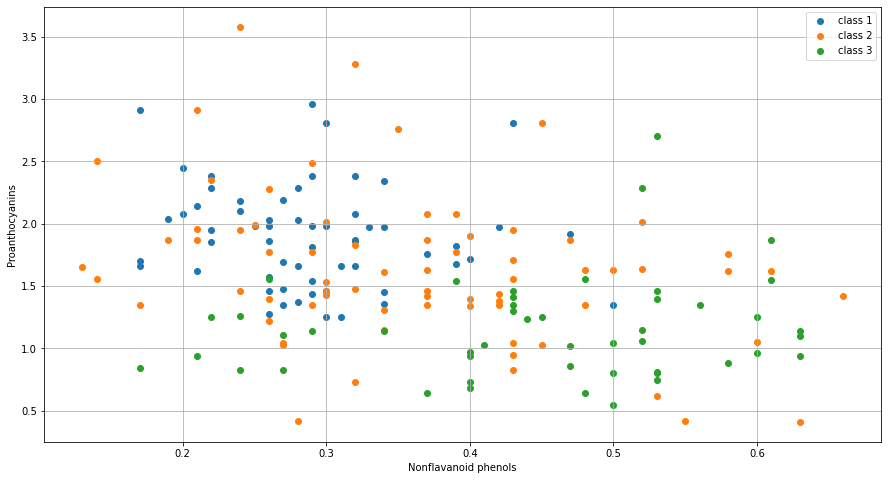

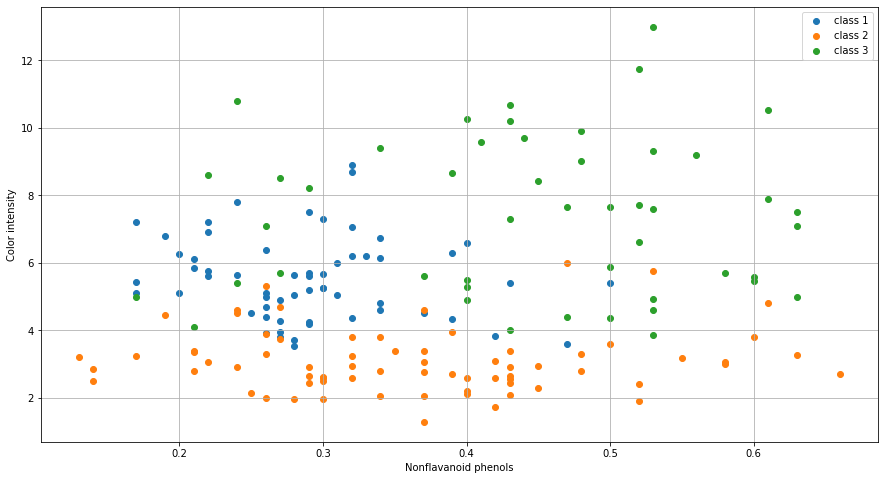

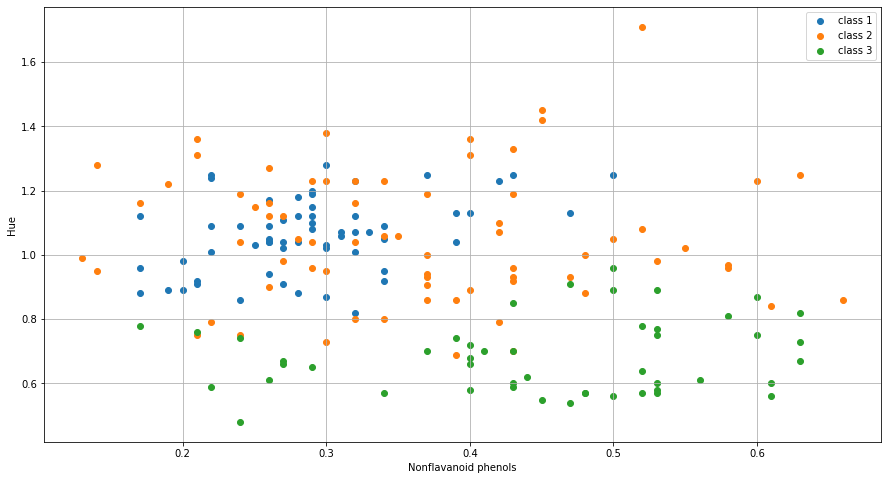

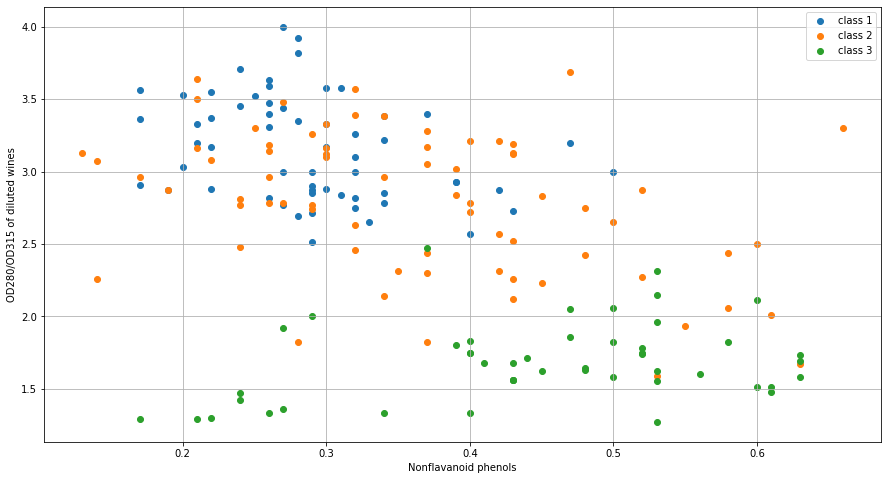

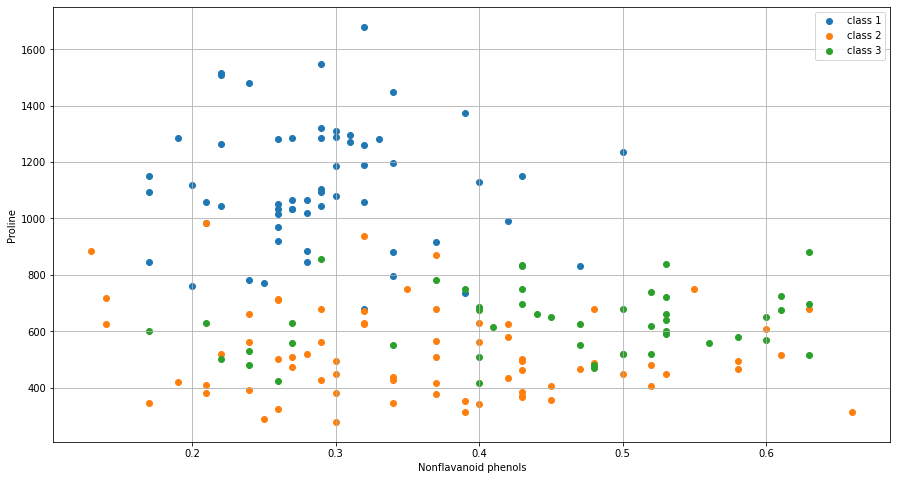

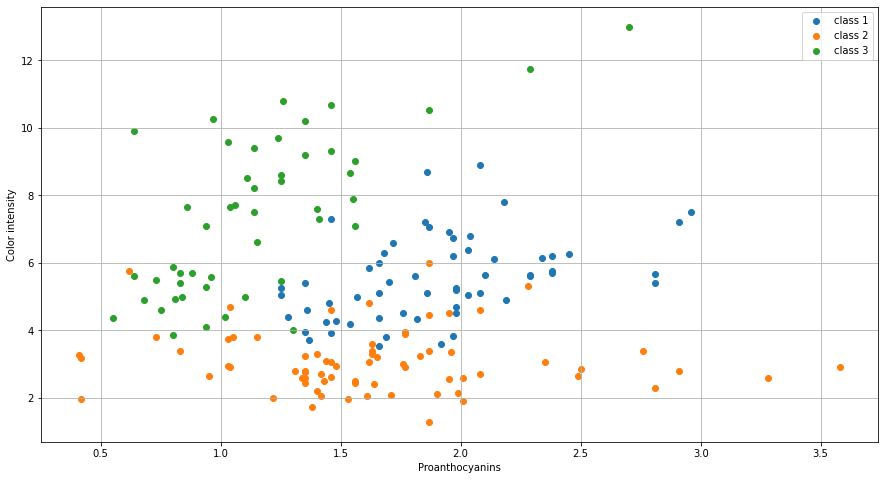

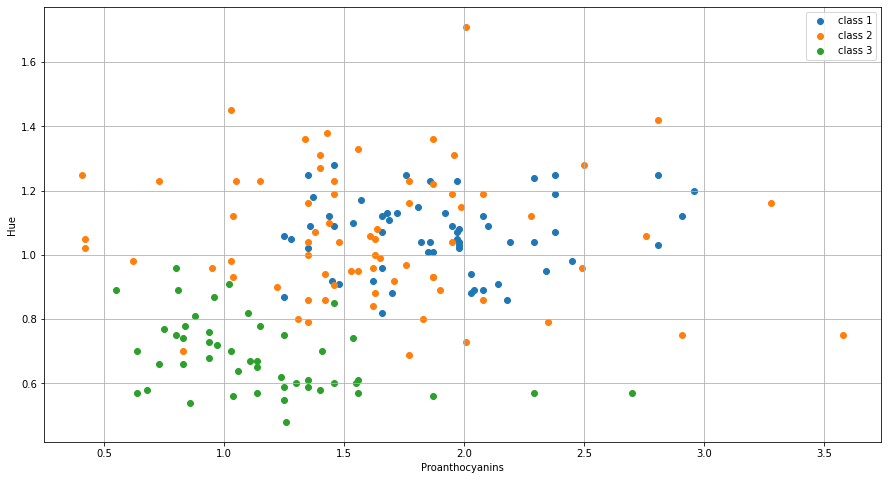

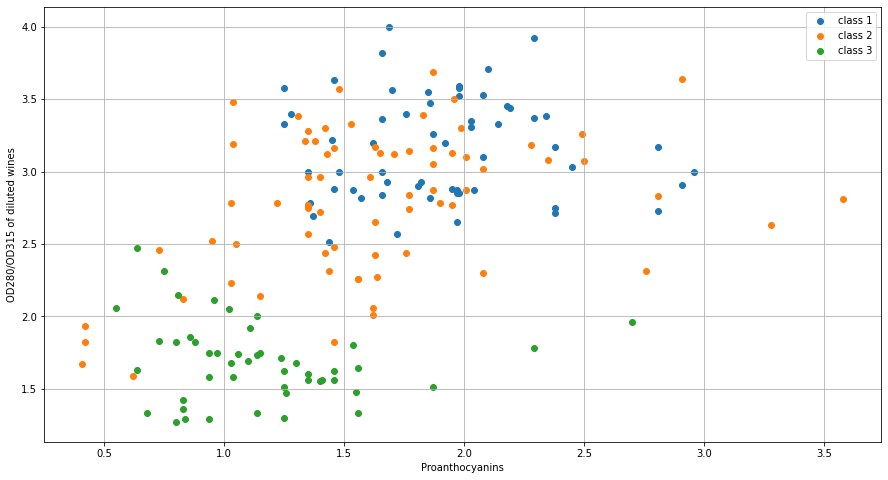

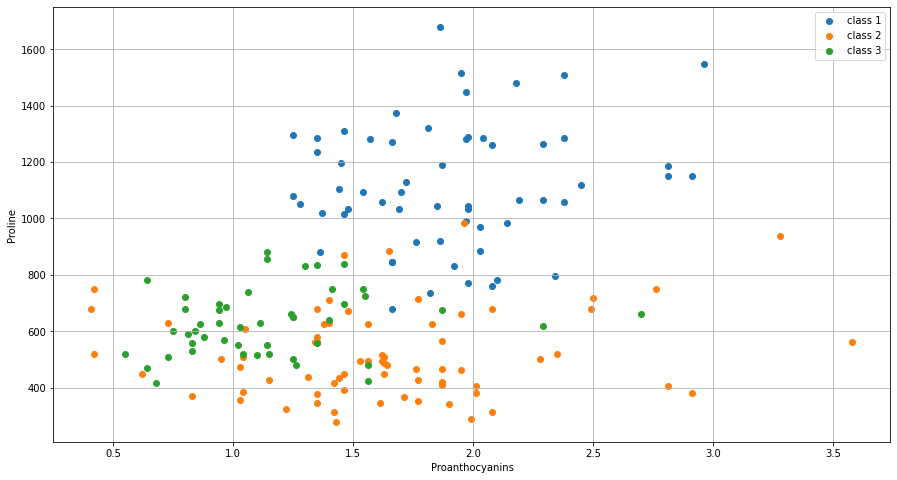

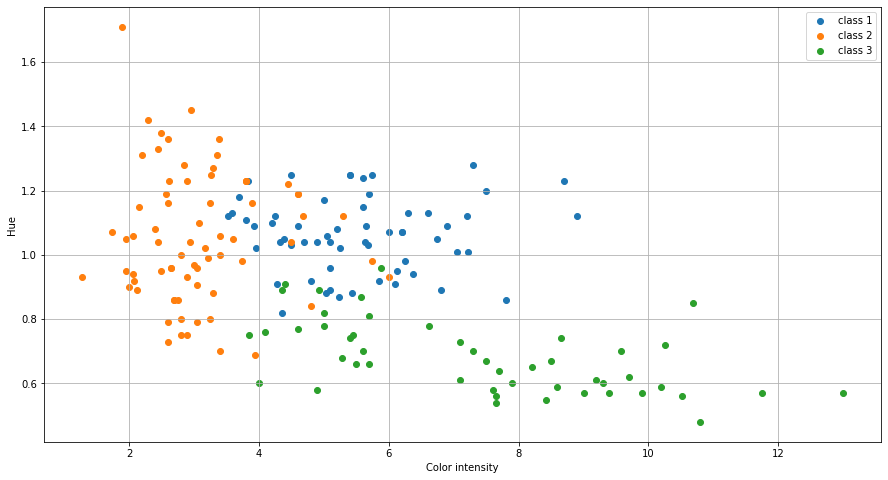

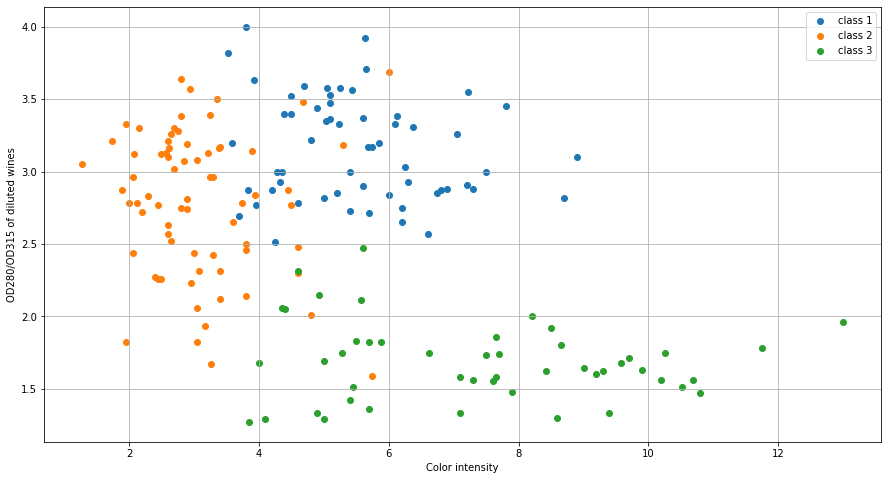

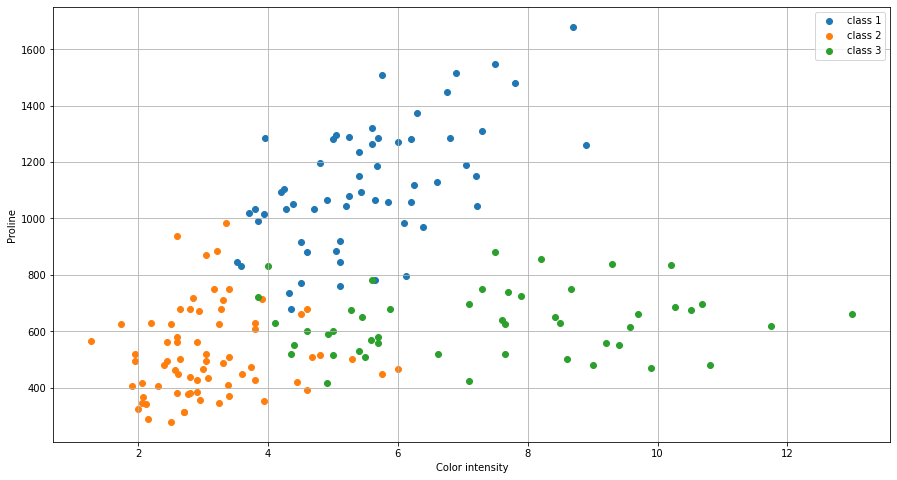

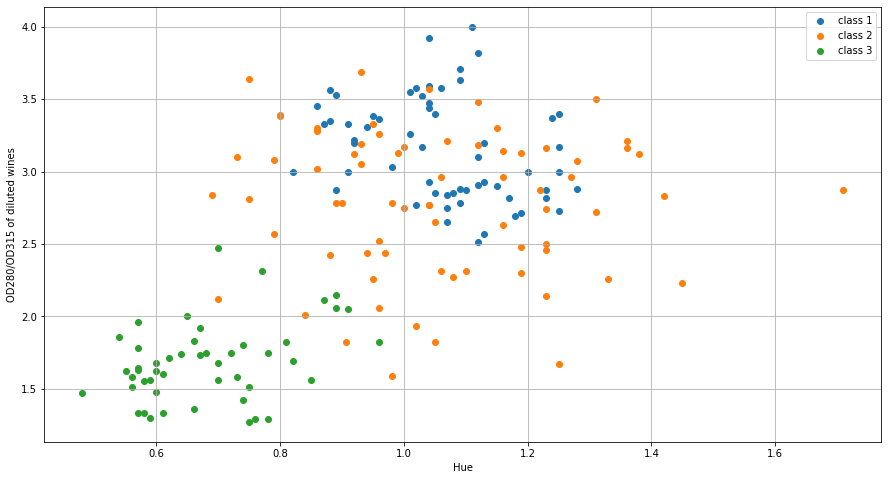

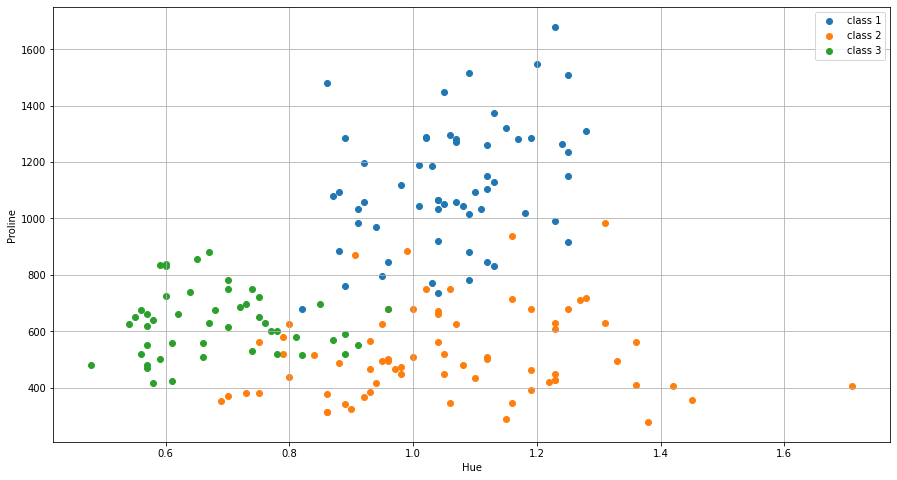

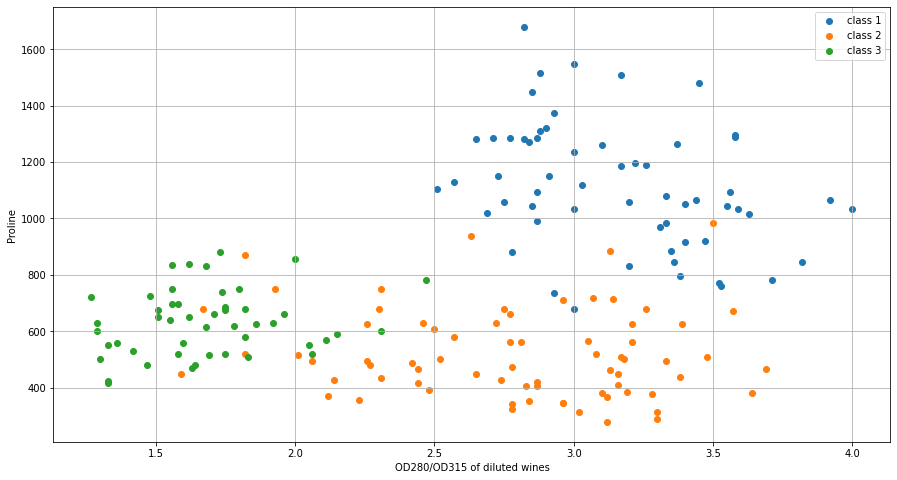

In [4]:
# on pop la première colonne car c'est juste un index
columns.pop(0)
class1,class2,class3 = getClasses(wine_df)
for i in range(len(columns)):
    for j in range(i,len(columns)):
        if(i == j):
            continue
        fig,axes = plt.subplots(figsize=(15,8))
        axes.scatter(class1[columns[i]],class1[columns[j]])
        axes.scatter(class2[columns[i]],class2[columns[j]])
        axes.scatter(class3[columns[i]],class3[columns[j]])
        axes.legend(['class 1','class 2','class 3'])
        plt.grid(True)
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()      
        

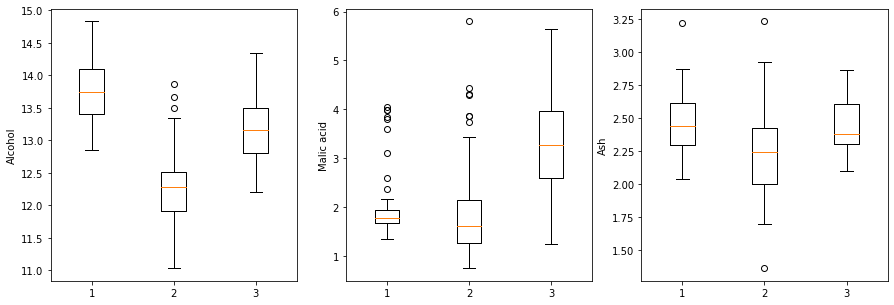

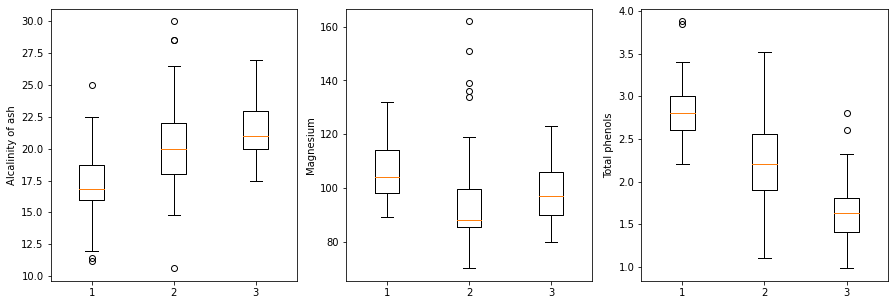

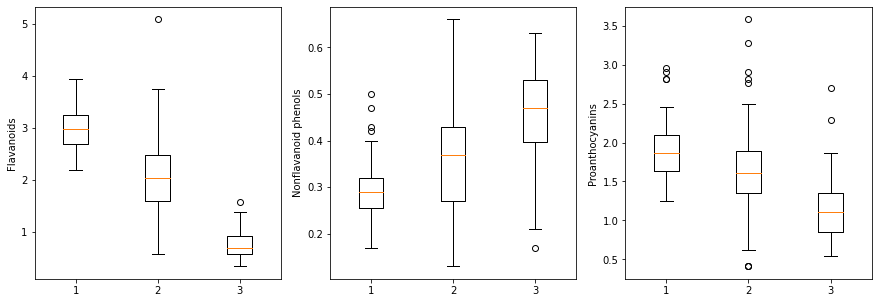

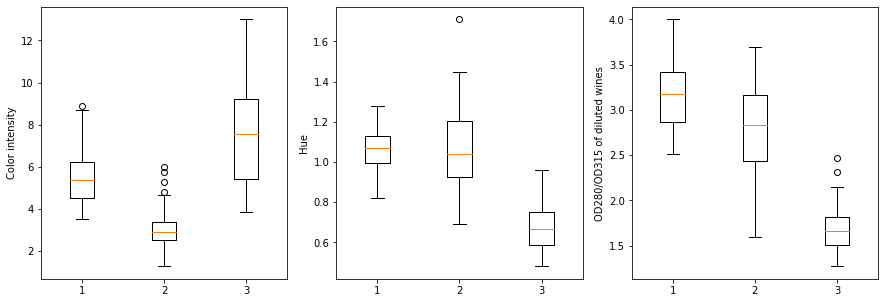

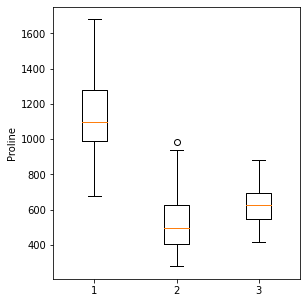

In [6]:
for c in range(0, len(columns), 3):
    fix,ax = plt.subplots(1,3, figsize=(15,5))
    for x in range(0,3):
        if (c+x >= len(columns)) :
            ax[x].set_visible(False)
        else:
            ax[x].boxplot([class1[columns[c+x]],class2[columns[c+x]],class3[columns[c+x]]],labels=(1,2,3))
            ax[x].set_ylabel(columns[c+x])
